## Random Coverage Plot
This project aims to measure the coverage of a random seed set. The set contains randomly generated seeds of the possible $4^7$. Sets are of size 100-1600 in intervals of 100, with 30 trials for each interval. A a trial measures how many genes a set of seeds covers. This data is then saved in order to be compared to optimal seeds. 

The random seeds cover can be plotted with boxplots for each interval. The red 'X' marks the real seed coverage as compared to the random seed coverage. The blue and green X's mark the real seed coverage for pre-verbrata and post-verbrata seeds repsectively. 

NOTE: I suspect the file is too large for loadtxt to retreive the data, so it kills the kernal. Instead, I've opted to create the contents of the 'All.txt' file by loading the data for each genome separately and concatenating them together. For this reason, I've kept the 'All.txt' file in the genome data for reference, but it is no longer being used. 

In [184]:
from numpy import loadtxt
import os
import glob
import random
from matplotlib import pyplot as plt
import ast
import itertools as it
import numpy as np

In [2]:
species_list = [
    ('Lamprey genes (Pmarinus_7.0)','Sea Lamprey (Petromyzon marinus)'),
    ('Hagfish genes (Eburgeri_3.2)','Inshore hagfish (Eptatretus burgeri)'),
    ('Elephant shark genes (Callorhinchus_milii-6.1.3)','Australian ghostshark (Callorhinchus milii)'),
    ('Spotted gar genes (LepOcu1)','Spotted gar (Lepisosteus oculatus)'),
    ('Zebrafish genes (GRCz11)','Zebrafish (Danio rerio)'),
    ('Atlantic cod genes (gadMor3.0)','Cod (Gadus morhua)'),
    ('Coelacanth genes (LatCha1)','Coelacanth (Latimeria chalumnae)'),
    ('Tropical clawed frog genes (Xenopus_tropicalis_v9.1)','Tropical clawed frog (Xenopus tropicalis)'),
    ('Tuatara genes (ASM311381v1)','Tuatara (Sphenodon punctatus)'),
    ('Green anole genes (AnoCar2.0v2)','Green anole lizard (Anolis carolinensis)'),
    ('Painted turtle genes (Chrysemys_picta_bellii-3.0.3)','Western painted turtle (Chrysemys picta bellii)'),
    ('Zebra finch genes (bTaeGut1_v1.p)','Zebra finch (Taeniopygia guttata)'),
    ('Chicken (maternal Broiler) genes (bGalGal1.mat.broiler.GRCg7b)','Chicken (Gallus gallus)'),
    ('Platypus genes (mOrnAna1.p.v1)','Platypus (Ornithorhynchus anatinus)'),
    ('Opossum genes (ASM229v1)','Gray short-tailed opossum (Monodelphis domestica)'),
    ('Armadillo genes (Dasnov3.0)','Nine-banded armadillo (Dasypus novemcinctus)'),
    ('Cow genes (ARS-UCD1.2)','Cow (Bos taurus)'),
    ('Dog genes (ROS_Cfam_1.0)','Dog (Canis familiaris)'),
    ('Rabbit genes (OryCun2.0)','Rabbit (Oryctolagus cuniculus)'),
    ('Guinea Pig genes (Cavpor3.0)','Guinea pig (Cavia porcellus)'),
    ('Rat genes (mRatBN7.2)','Norway rat (Rattus norvegicus)'),
    ('Mouse genes (GRCm39)','House mouse (Mus musculus)'),
    ('Human genes (GRCh38.p13)','Human (Homo sapiens)'),
    ('Human TargetScan','Human (Homo sapiens) TargetScan'),
    ('All','All')
]

In [3]:
def randMotifs(canon_site, size):
    if canon_site == 'A':
        motif_list = [''.join(i) for i in it.product('AGCT', repeat=6)]
        motif_list = [item + 'A' for item in motif_list]
        sample = random.sample(motif_list,size)
    elif canon_site == 'B':
        motif_list = [''.join(i) for i in it.product('AGCT', repeat=7)]
        sample = random.sample(motif_list,size)
    elif canon_site == 'C':
        motif_list = [''.join(i) for i in it.product('AGCT', repeat=7)]
        motif_list = [item + 'A' for item in motif_list]
        sample = random.sample(motif_list,size)
    return sample

In [4]:
def simulate_number(data, number, filename, new_file_name, canon_site):    
    data_for_trials = []
    for trials in range(0,30):
        #generate a list of random motifs
        motifs = randMotifs(canon_site, number)
        covered_list = []

        for gene in data:
            for motif in motifs:
                if motif in gene:
                    covered_list.append(gene)
                    break
                    
        #Remove repeats
        covered_list = [*set(covered_list)]
        #Count the number of genes covered
        covered_num = len(covered_list)

        data_for_trials.append(covered_num)
    
    with open(new_file_name, "w") as output:
        output.write(str(data_for_trials))
    print("Done: "+filename+" "+str(number))

In [5]:
def simulate_species_main(filename, canon_site):
    if filename == 'All':
        data = []
        for species in species_list:
            if species[0]!='All':
                temp_data = loadtxt("Genome Data/"+species[0]+".txt", comments=">",dtype="str")
                #remove all the Unavailable sequences and sequences that are too short
                allowed_char = 'AGCT'
                temp_data = list(filter(lambda a: all(ch in allowed_char for ch in a) and len(a)>7, temp_data))
                print(species[0]+": "+str(len(temp_data)))
                data = data+temp_data
    else:
        data = loadtxt("Genome Data/"+filename+".txt", comments=">",dtype="str")
        
    #remove all the Unavailable sequences and sequences that are too short
    allowed_char = 'AGCT'
    data = list(filter(lambda a: all(ch in allowed_char for ch in a) and len(a)>7, data))
    
    new_file_path = "Simulated Random Coverage/"+filename+"_simulation/Canon Site "+canon_site
    if not os.path.exists(new_file_path):
        os.makedirs(new_file_path)
    
    #loop to simulate 
    for list_size in range(0, 1700, 100):
        new_file_name = os.path.join(new_file_path, str(list_size)+".txt")
        if not os.path.exists(new_file_name):
            simulate_number(data, list_size, filename, new_file_name, canon_site)
        else:
            print(new_file_name +" found, skipping to next file")

In [283]:
#run simulate_species_main() here
sites = ['A','C','B']

for site in sites:
    for species in species_list:
        simulate_species_main(species[0], site)

Simulated Random Coverage/Lamprey genes (Pmarinus_7.0)_simulation/Canon Site A/0.txt found, skipping to next file
Simulated Random Coverage/Lamprey genes (Pmarinus_7.0)_simulation/Canon Site A/100.txt found, skipping to next file
Simulated Random Coverage/Lamprey genes (Pmarinus_7.0)_simulation/Canon Site A/200.txt found, skipping to next file
Simulated Random Coverage/Lamprey genes (Pmarinus_7.0)_simulation/Canon Site A/300.txt found, skipping to next file
Simulated Random Coverage/Lamprey genes (Pmarinus_7.0)_simulation/Canon Site A/400.txt found, skipping to next file
Simulated Random Coverage/Lamprey genes (Pmarinus_7.0)_simulation/Canon Site A/500.txt found, skipping to next file
Simulated Random Coverage/Lamprey genes (Pmarinus_7.0)_simulation/Canon Site A/600.txt found, skipping to next file
Simulated Random Coverage/Lamprey genes (Pmarinus_7.0)_simulation/Canon Site A/700.txt found, skipping to next file
Simulated Random Coverage/Lamprey genes (Pmarinus_7.0)_simulation/Canon Si

KeyboardInterrupt: 

In [582]:
def simulate_plot(genome_filename, mature_filename, canon_site):
    #load total data from folder 'filename'
    total_data = {}
    new_file_path = "Simulated Random Coverage/"+genome_filename+"_simulation/Canon Site "+canon_site
    for ID in glob.glob(os.path.join(new_file_path, '*.txt')):
           with open(os.path.join(os.getcwd(), ID), 'r') as f:
                total_data[int(os.path.basename(ID).split('/')[-1].strip(".tx"))] = (ast.literal_eval(f.read()))
                
    #sort total_data by number of seeds
    total_data = dict(sorted(total_data.items(), key=lambda x:x[1]))
    
    #generate means points (to plot line through boxplots)
    mean = {}
    maxes = {}
    mins = {}
    for i in total_data:
        mean[int(i)] = np.median(total_data[i])
        maxes[int(i)] = np.quantile(total_data[i],.95)
        mins[int(i)] = np.quantile(total_data[i],.05)
    
    #font
    font = {'family' : 'Helvetica',
        'weight' : 'bold',
        'size'   : 12}
    plt.rc('font', **font)
    
    #figure
    fig,ax = plt.subplots(figsize=(12,10))
    fig.patch.set_facecolor('white')
    plt.title(genome_filename + " Canon Site " + canon_site +" Random Cover Boxplot")
    
    #boxplot
    ax.boxplot(total_data.values(), 
               positions=list(total_data.keys()), 
               widths = 85, 
               medianprops = dict(color="#ed5a31",linewidth=1.1))
    ax.set_xticklabels(total_data.keys())
    
    #median line
    plt.plot(mean.keys(), mean.values(), c = '#cb275a')
    plt.plot(maxes.keys(), maxes.values(), c = '#cb275a', alpha = .4)
    plt.plot(mins.keys(), mins.values(), c = '#cb275a', alpha = .4)
    plt.fill_between(list(mean.keys()), list(mean.values()), list(maxes.values()), facecolor='#cb275a', alpha = .4,interpolate=True)
    plt.fill_between(list(mean.keys()), list(mins.values()), list(mean.values()), facecolor='#cb275a', alpha = .4,interpolate=True)
    
    #plot real coverage of Norm_v, Pre_v, and Post_v
    new_file_path = "Real Coverage/"+mature_filename+"/Canon Site "+canon_site
    with open(new_file_path+"/Norm_v.txt", 'r') as f:
        norm_data = ast.literal_eval(f.read())
    plt.plot(norm_data[0], norm_data[1], marker="x", markersize=10, markeredgecolor="#cb275a")
    
    #legend
    plt.rcParams.update({'font.size': 12})
    patch = [mpatches.Patch(color='#cb275a', label='Real Seed Coverage')]
    plt.legend(handles=patch, bbox_to_anchor=(1.01, 1.0), loc='upper left')
    
    #zoom in
    plt.rcParams.update({'font.size': 12})
    plt.rcParams.update({'font.weight': 'normal'})
   
    y_margin = int(max(mean.values()))/20
    x_margin = 75
    x1, x2, y1, y2 = norm_data[0]-x_margin,norm_data[0]+x_margin,norm_data[1]-y_margin,norm_data[1]+y_margin
    d1 = ((.5**2)+(mins[700]/maxes[1600]**2))**.5
    beta = 1.4
    gamma = .07
    z = 13*d1
    
    axins1 = zoomed_inset_axes(ax, zoom = z, loc=7)
    
    axins1.plot(norm_data[0], norm_data[1], marker="x", markersize=10, markeredgecolor="#cb275a")
    axins1.boxplot(total_data.values(), 
               positions=list(total_data.keys()), 
               widths = 50, 
               medianprops = dict(color="#ed5a31",linewidth=1.1))
    axins1.plot(mean.keys(), mean.values(), c = '#cb275a')
    axins1.plot(maxes.keys(), maxes.values(),c = '#cb275a', alpha = .4)
    axins1.plot(mins.keys(), mins.values(), c = '#cb275a', alpha = .4)
    axins1.fill_between(list(mean.keys()), list(mean.values()), list(maxes.values()), facecolor='#cb275a', alpha = .4,interpolate=True)
    axins1.fill_between(list(mean.keys()), list(mins.values()), list(mean.values()), facecolor='#cb275a', alpha = .4,interpolate=True)
    
    axins1.set_xlim(x1, x2)
    axins1.set_ylim(y1, y2)
    mark_inset(ax, axins1, loc1=1, loc2=3, fc="none", ec="0.5")
    
    #savefig
    new_file_path = "Simulated Plots/"+genome_filename
    if not os.path.exists(new_file_path):
        os.makedirs(new_file_path)
    plt.savefig("Simulated Plots/"+genome_filename+"/Canon Site "+canon_site+" Random Cover Boxplot.svg", dpi=120, bbox_inches='tight')
    plt.show()

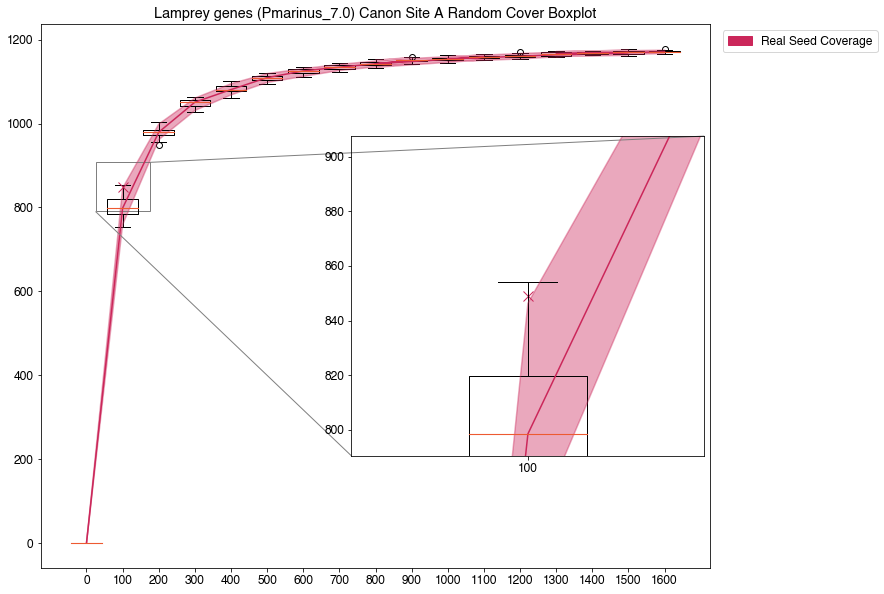

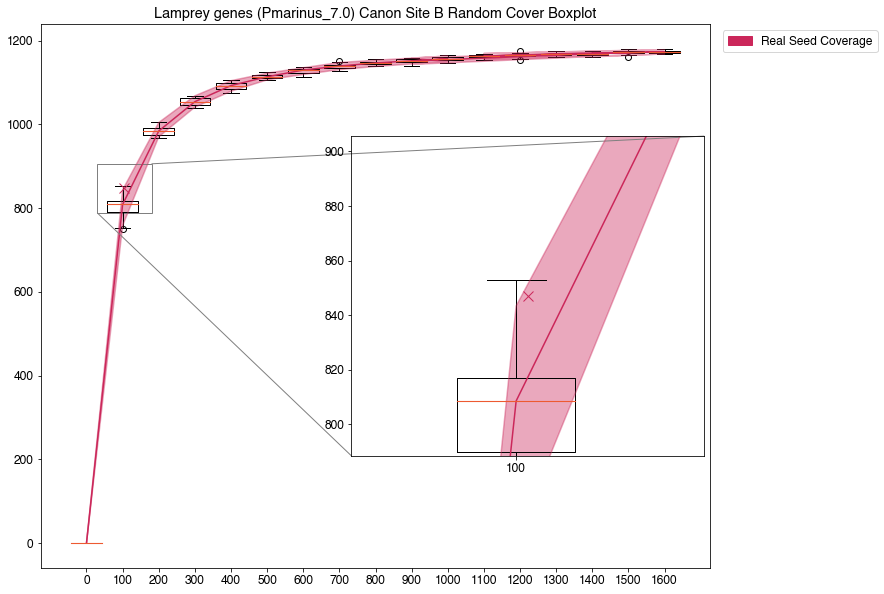

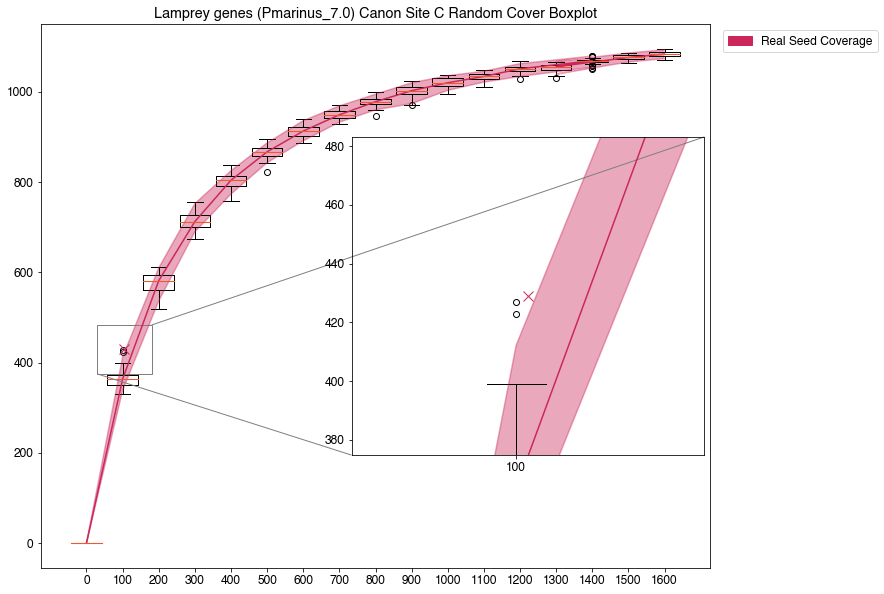

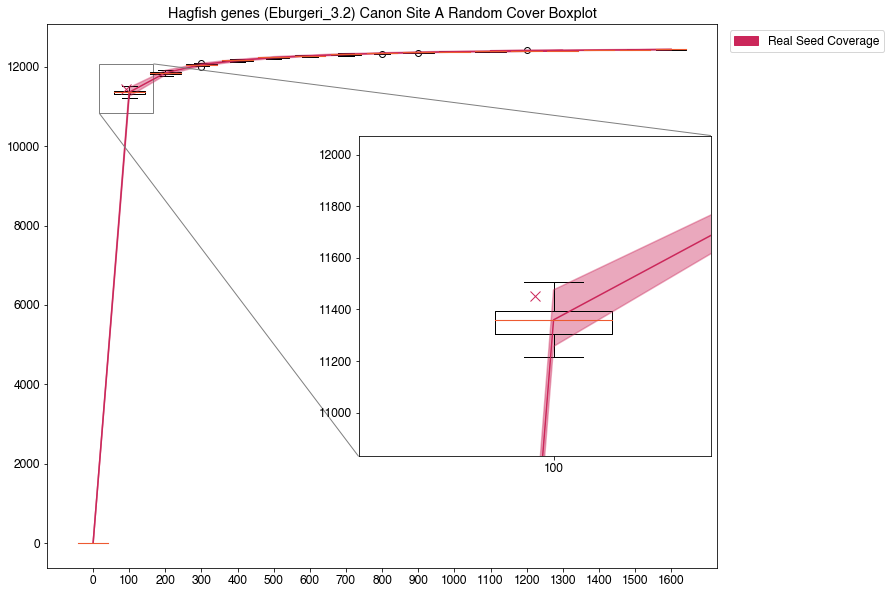

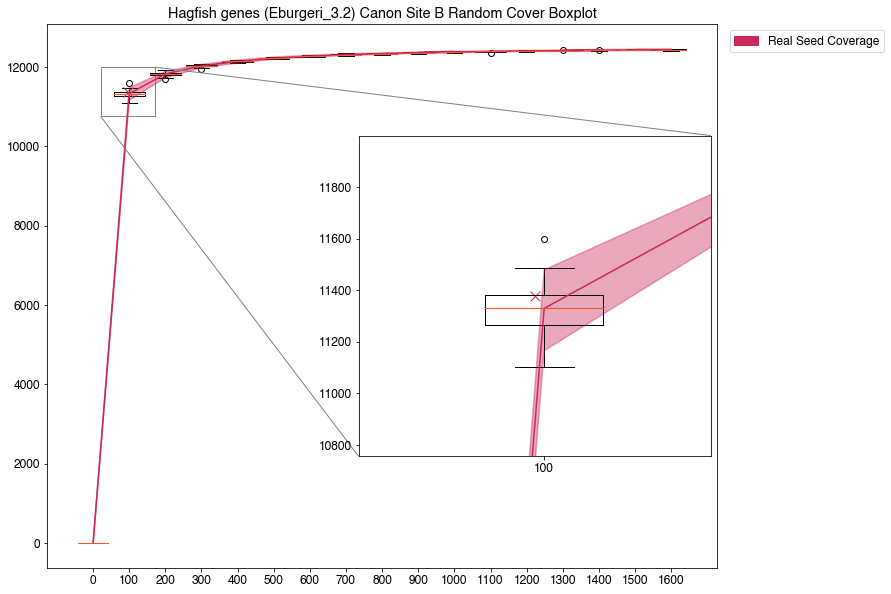

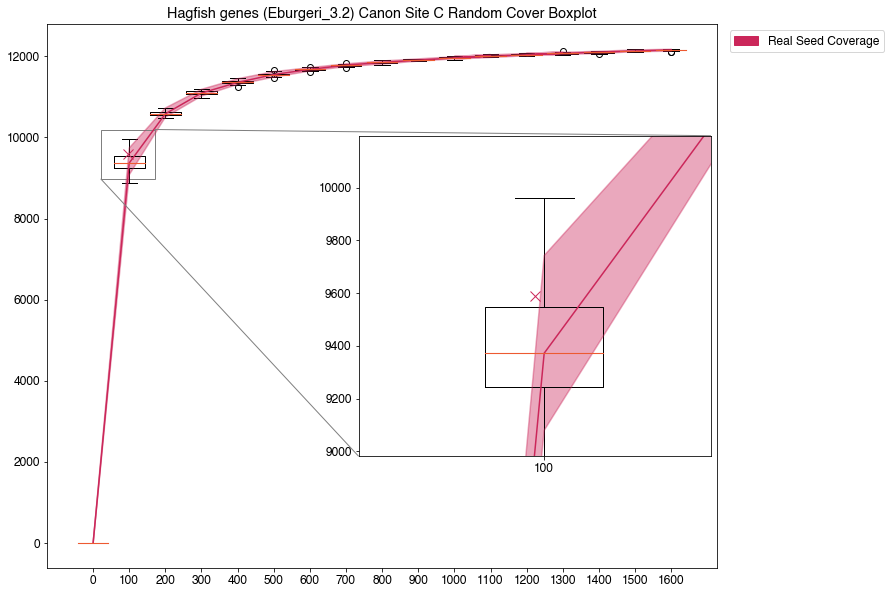

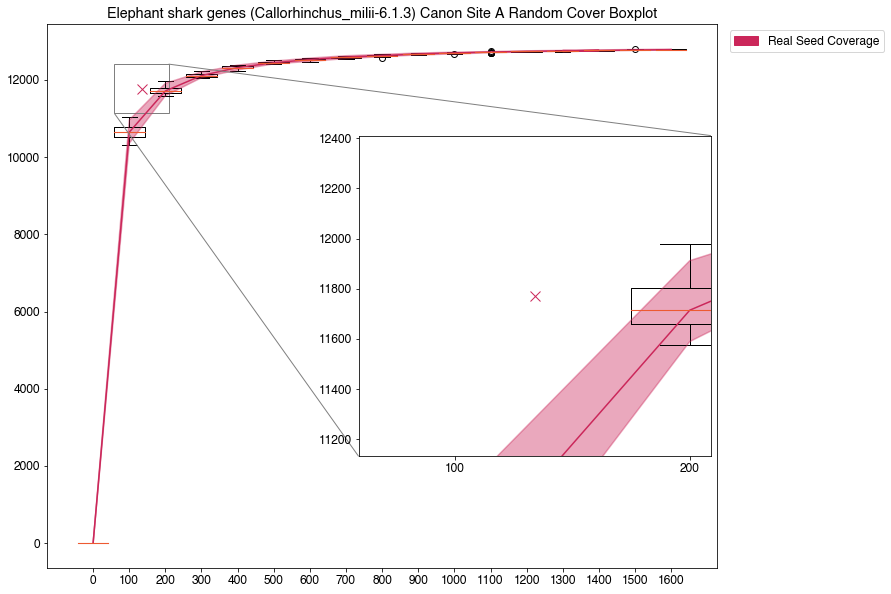

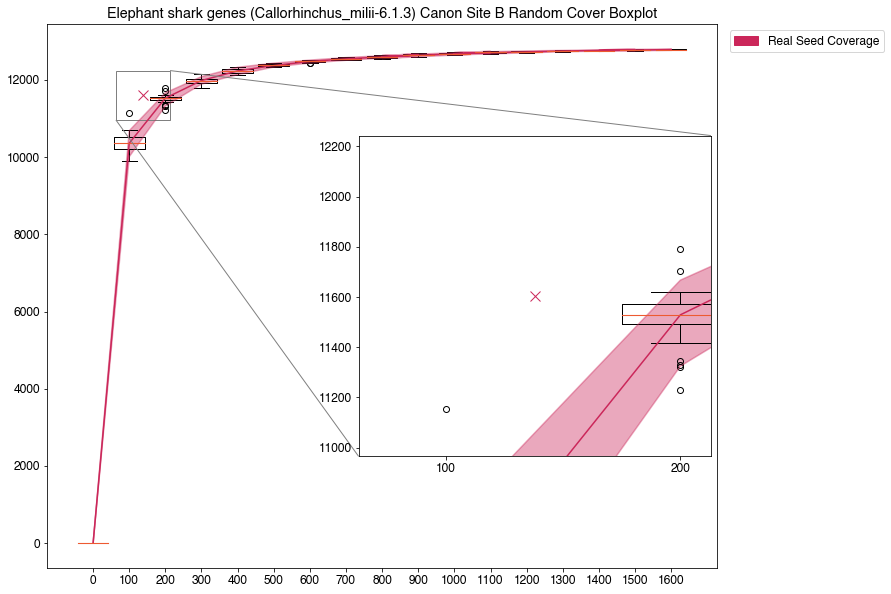

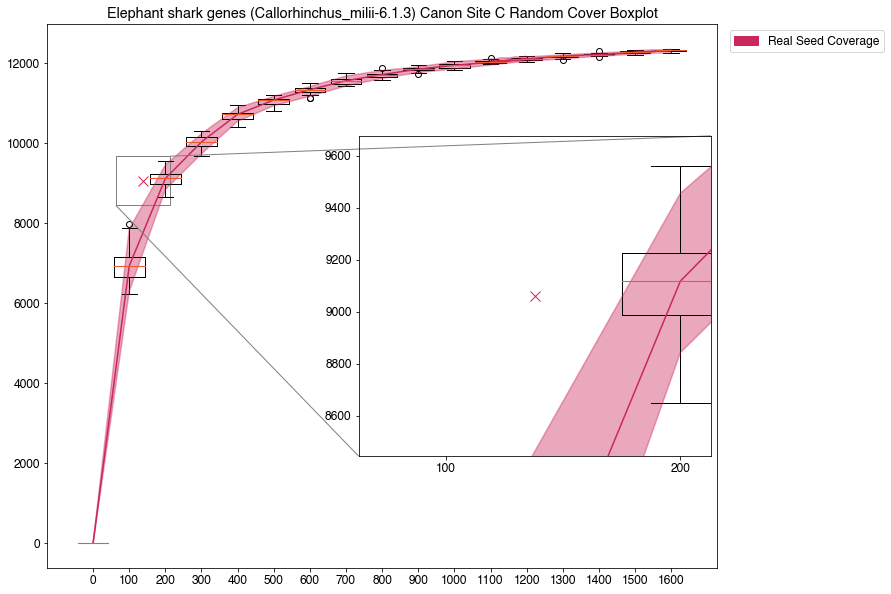

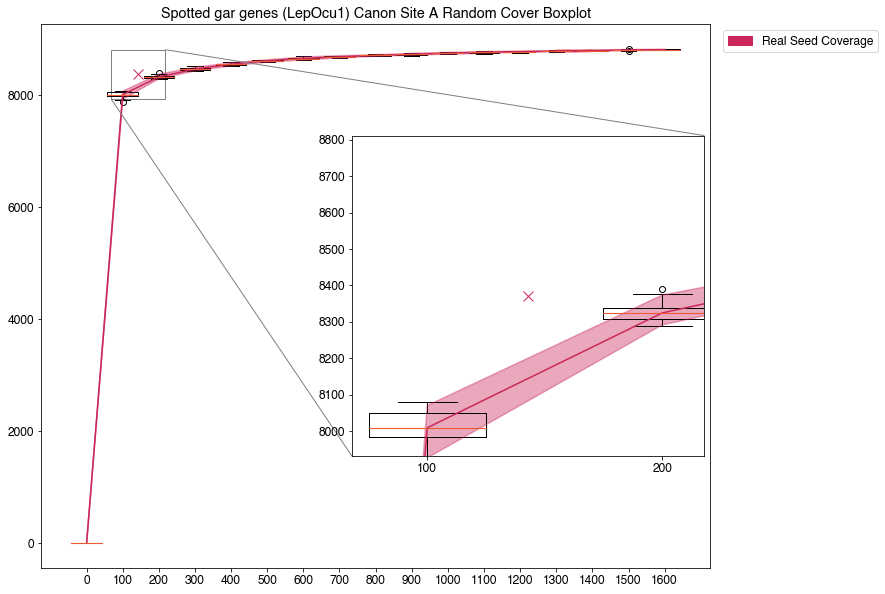

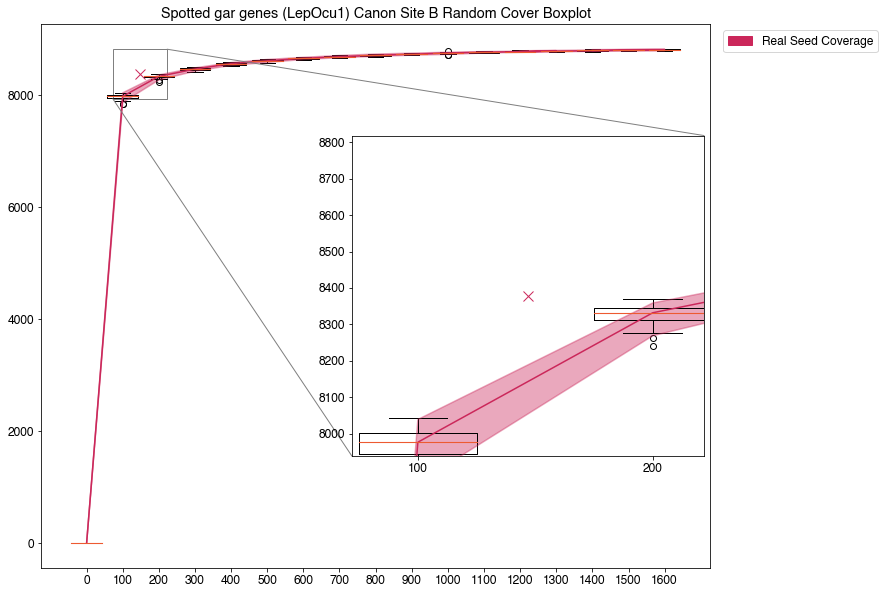

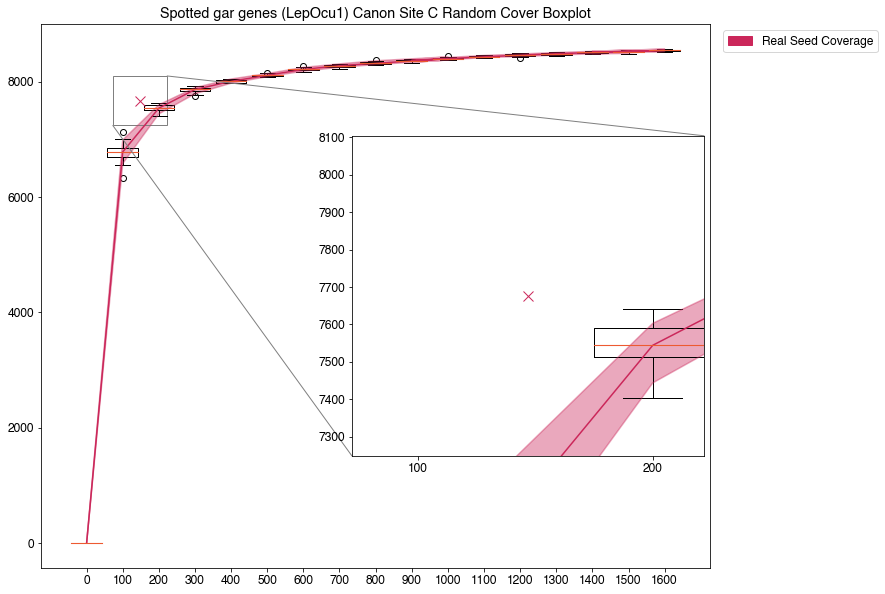

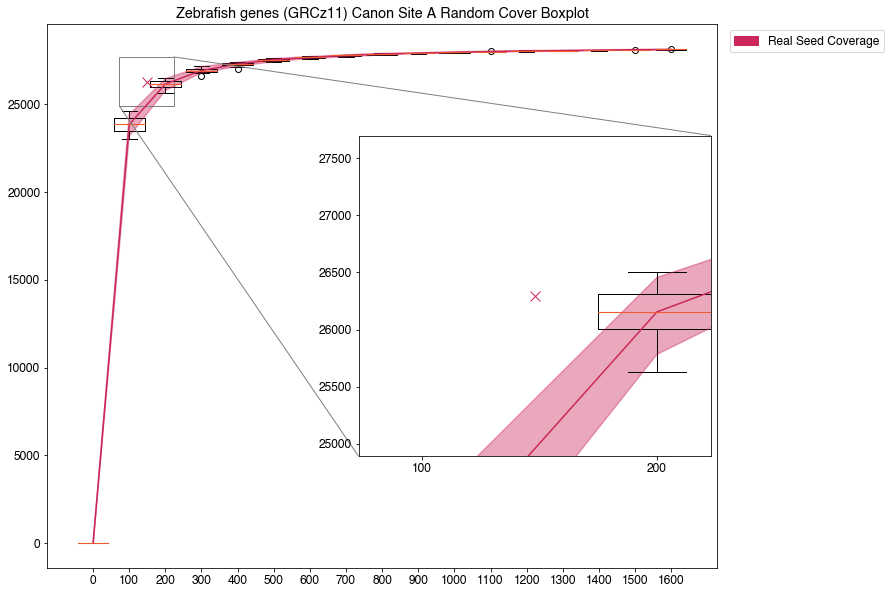

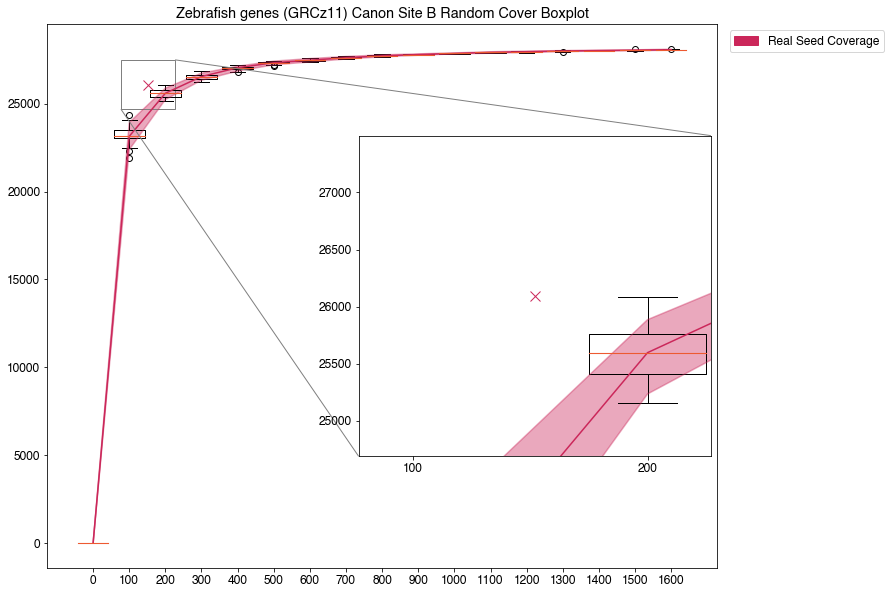

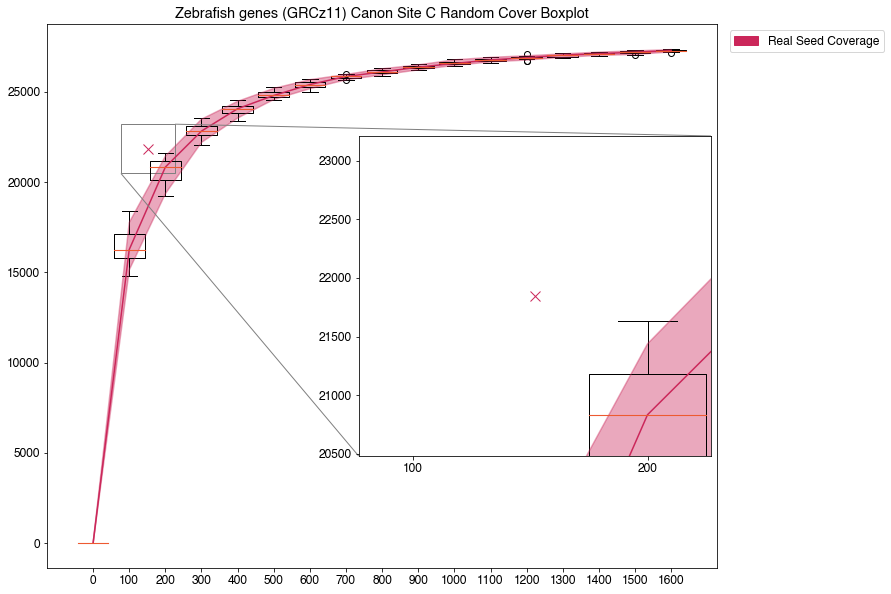

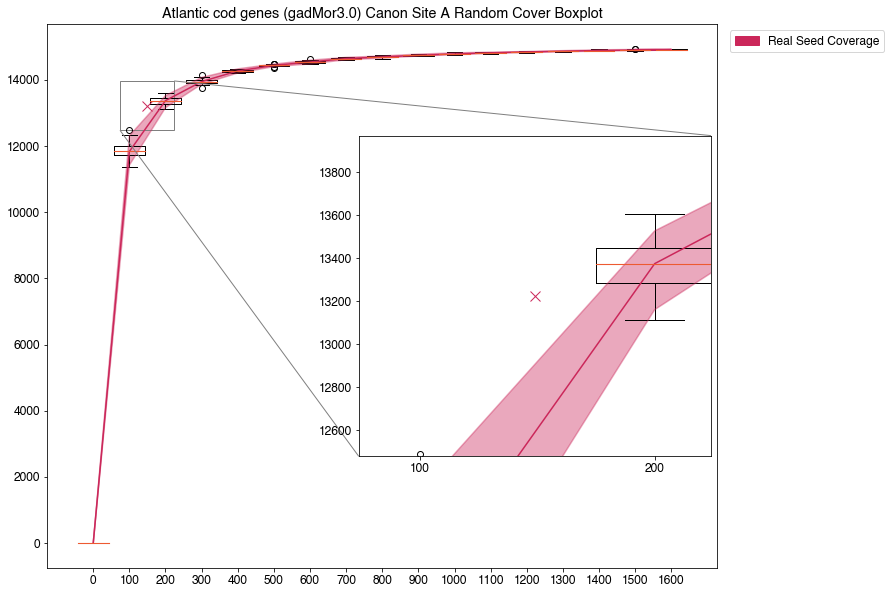

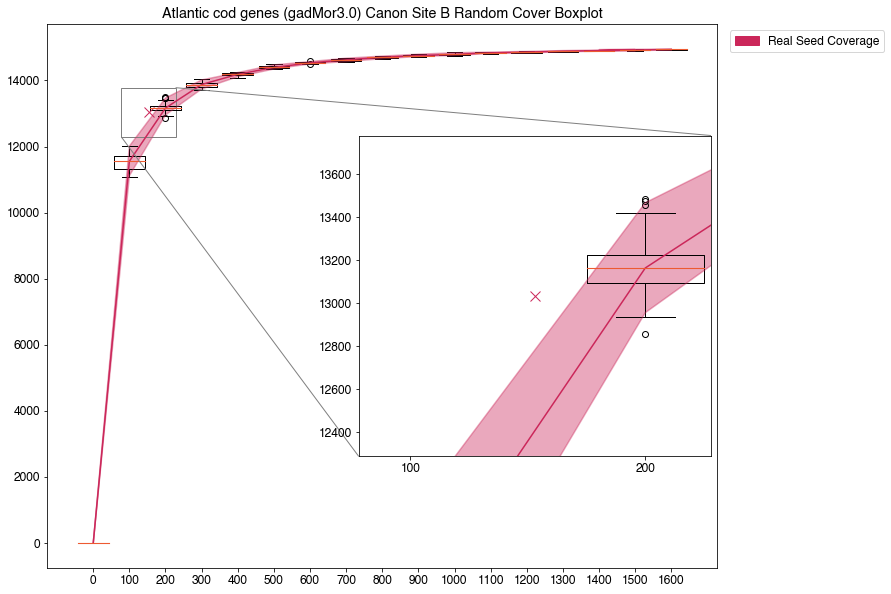

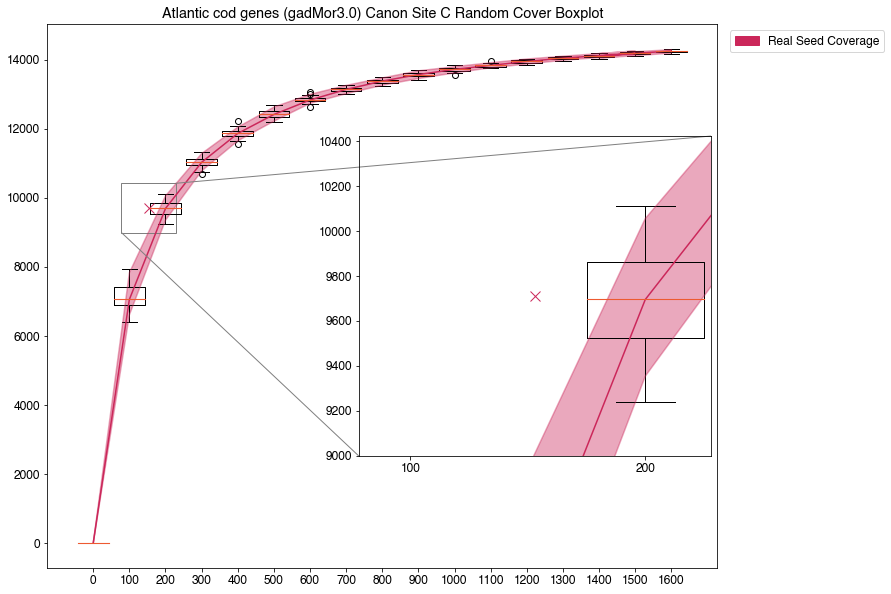

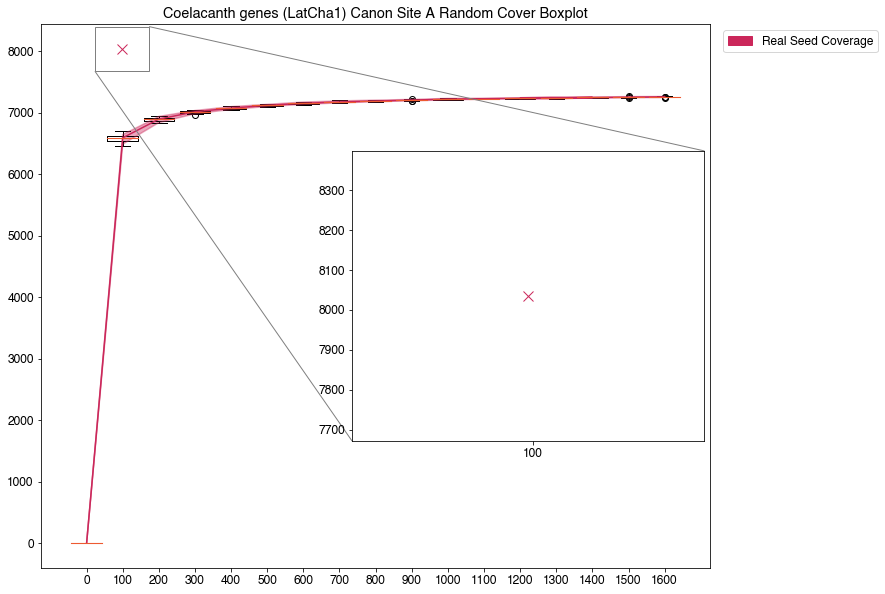

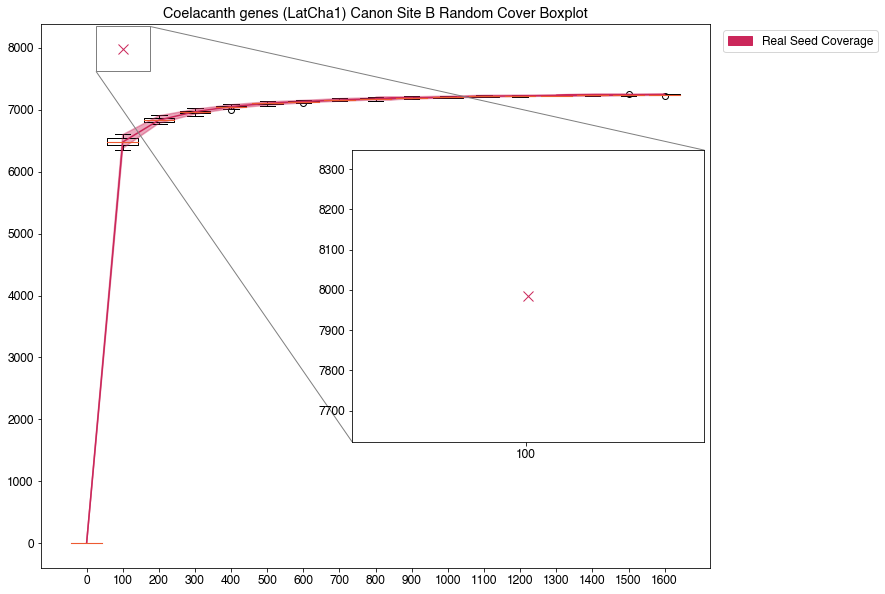

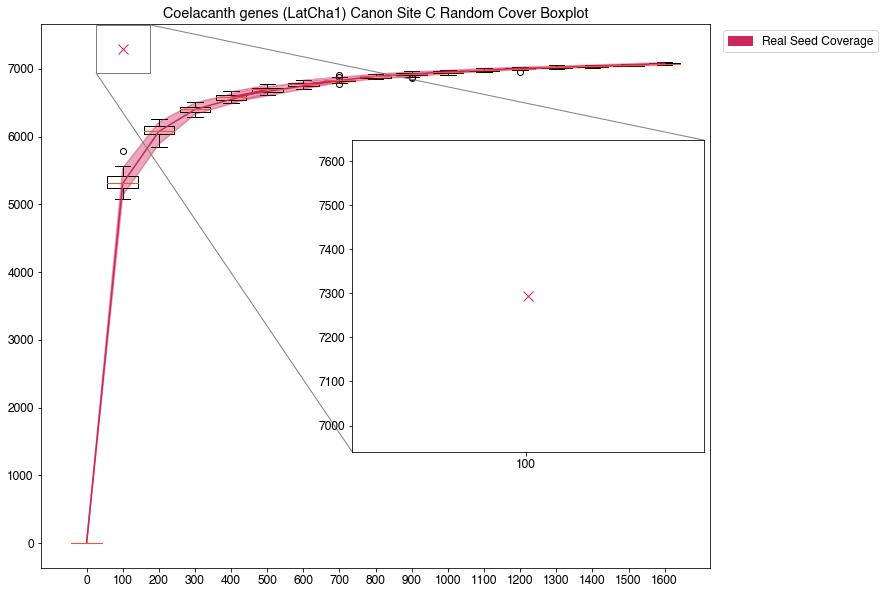

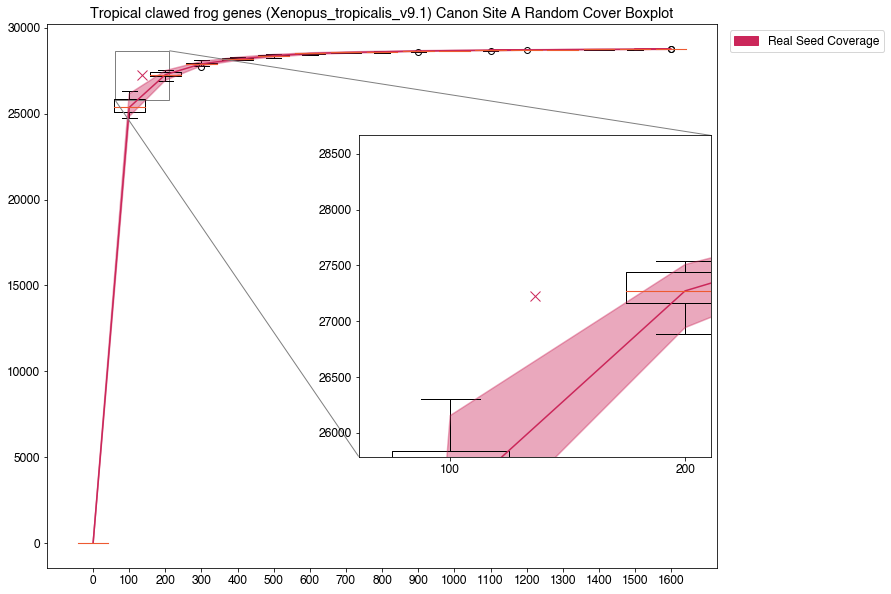

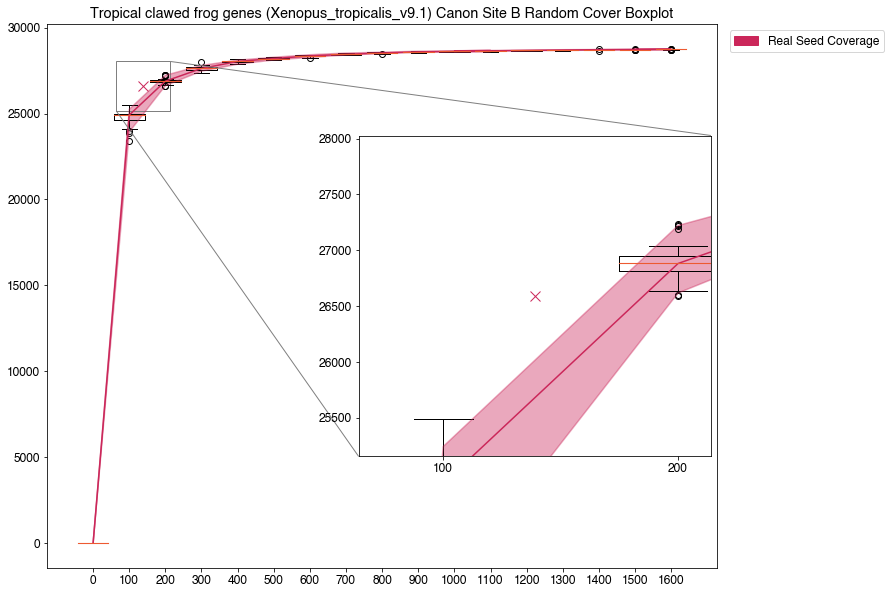

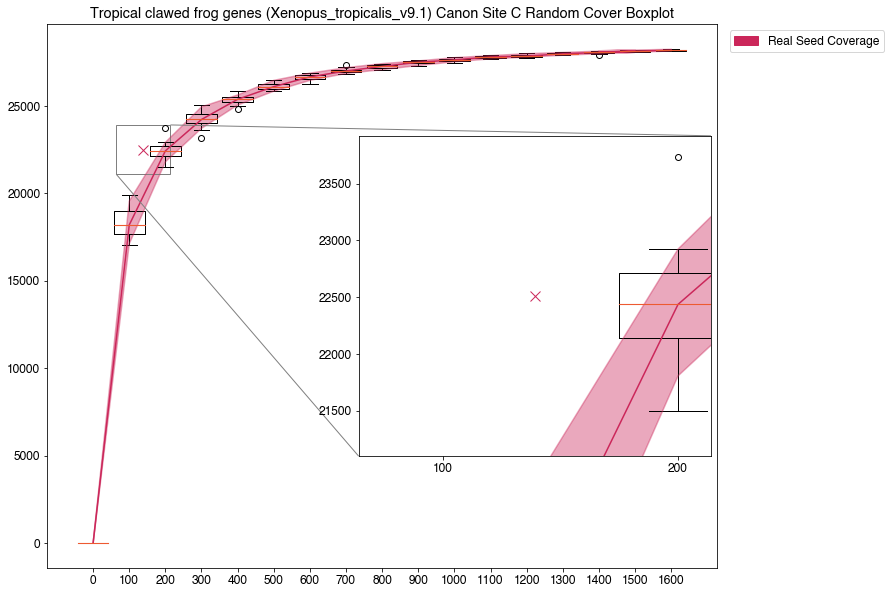

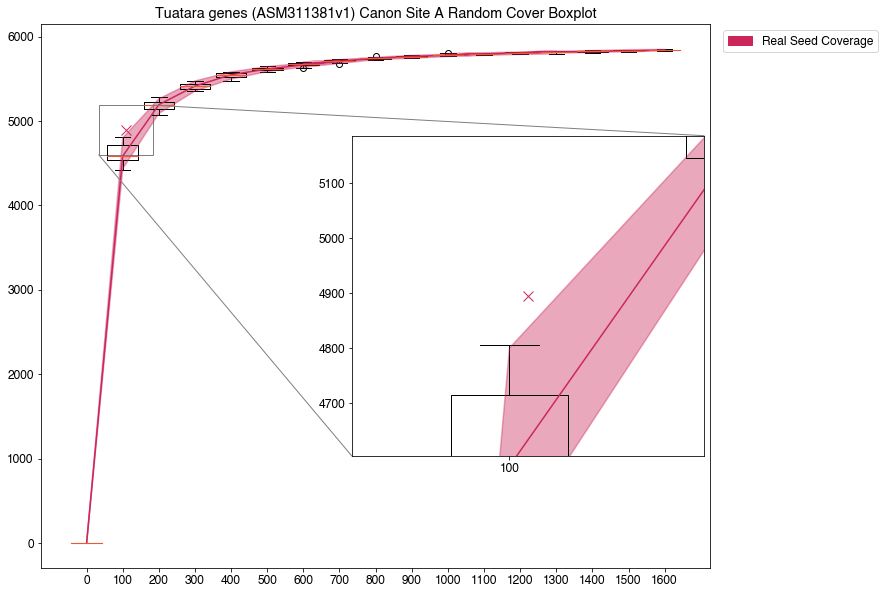

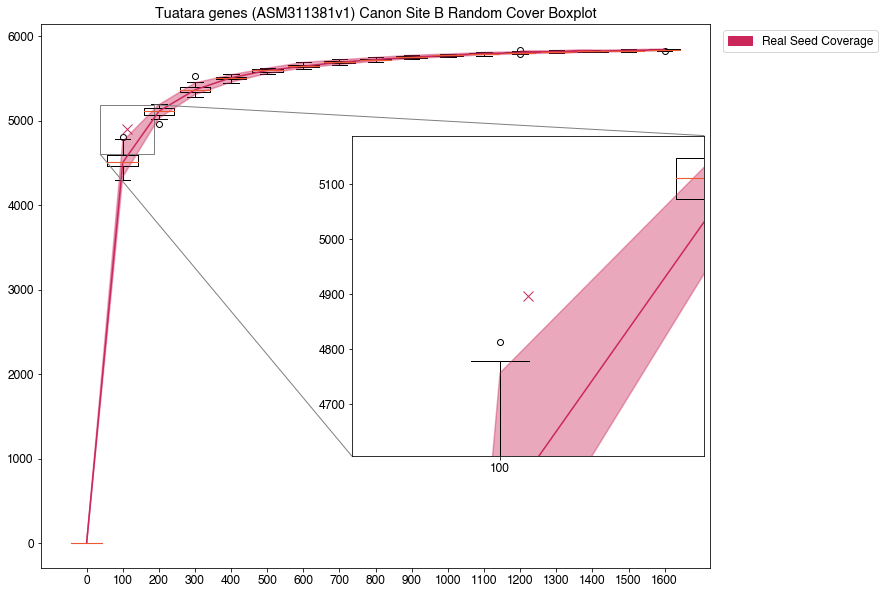

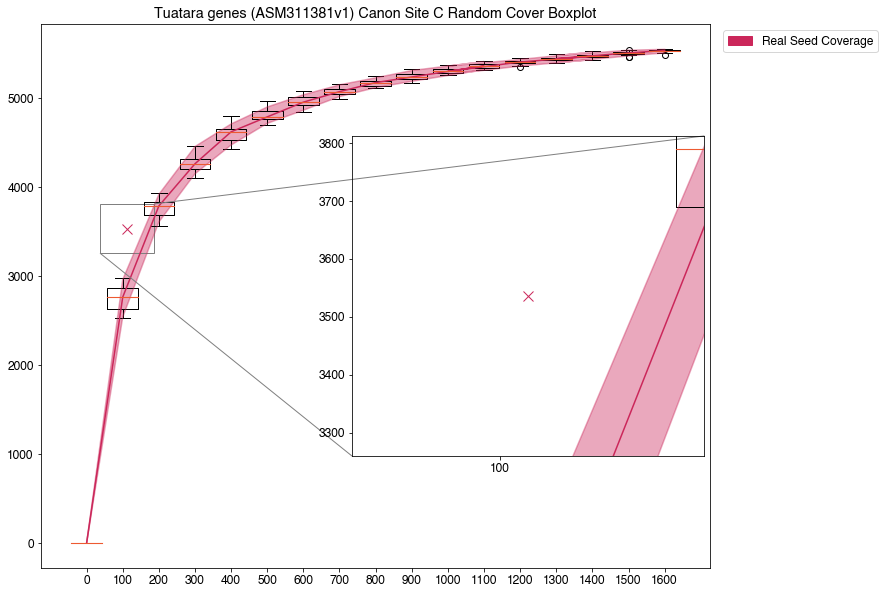

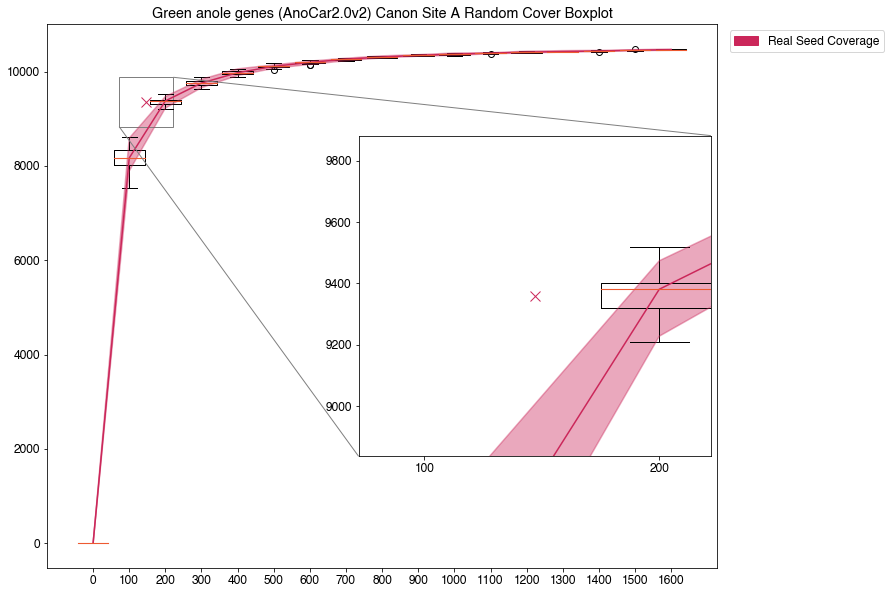

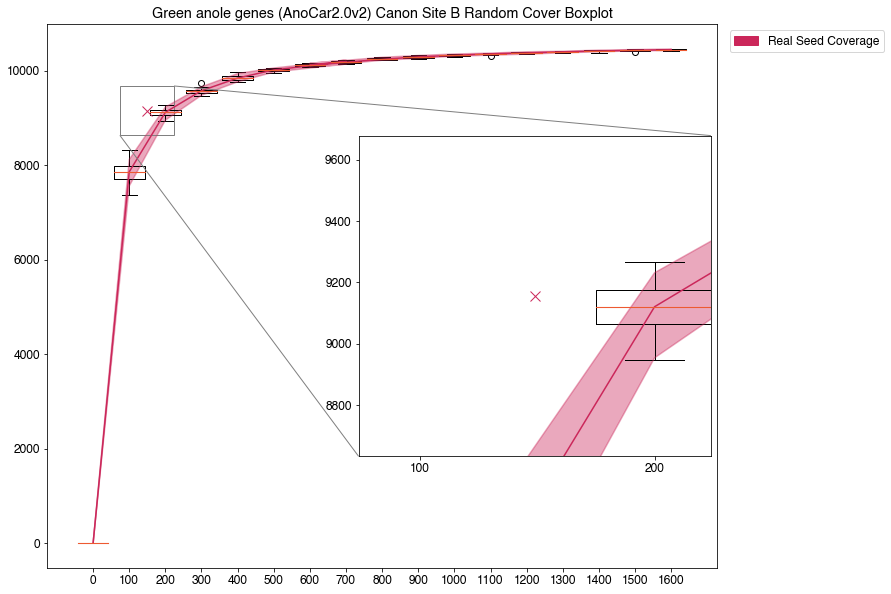

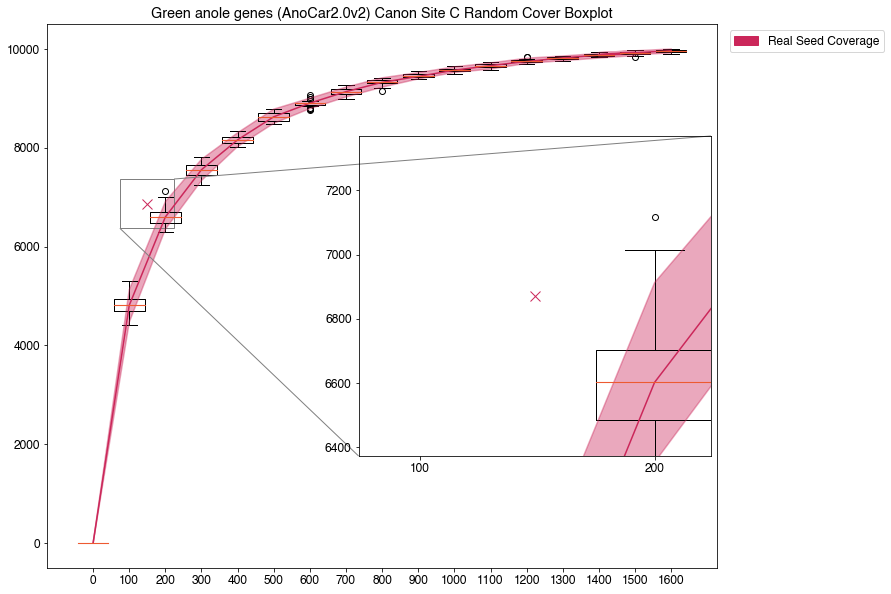

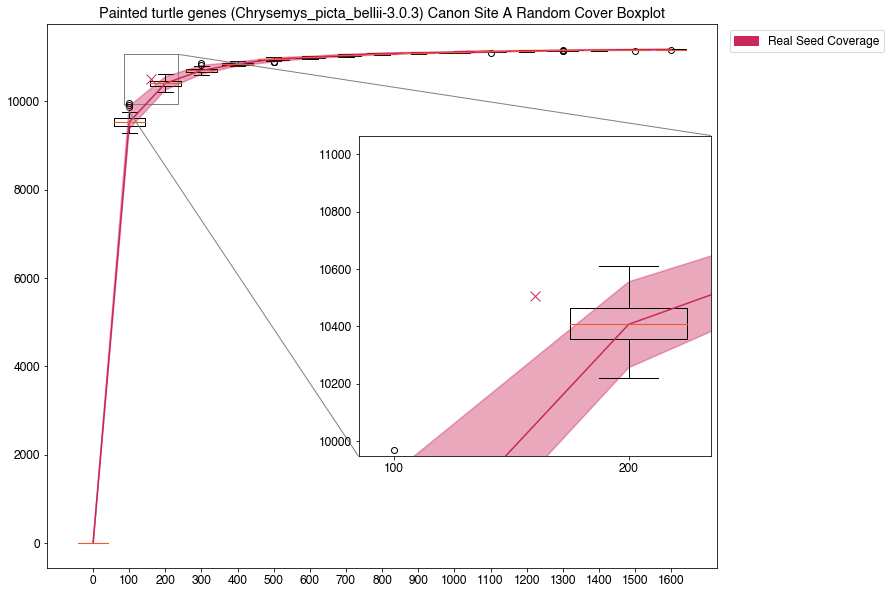

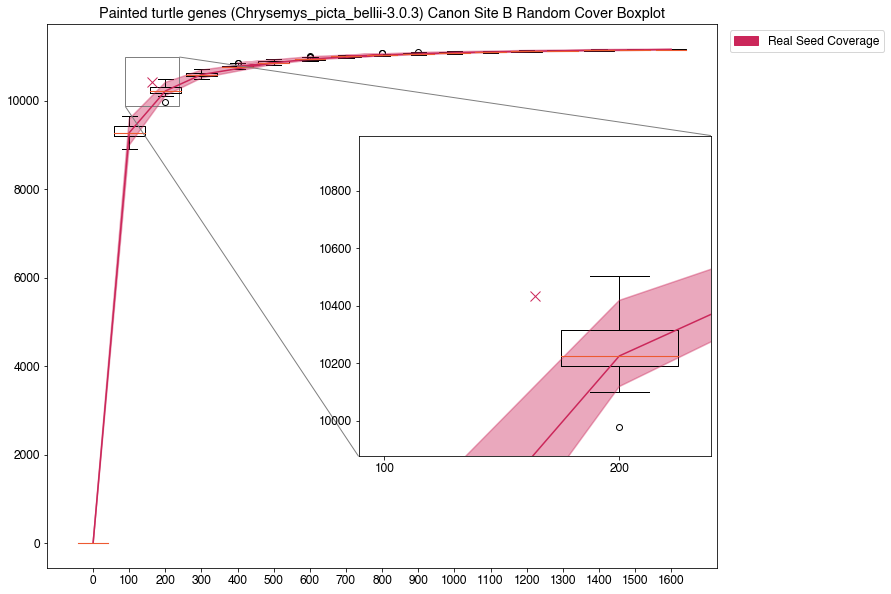

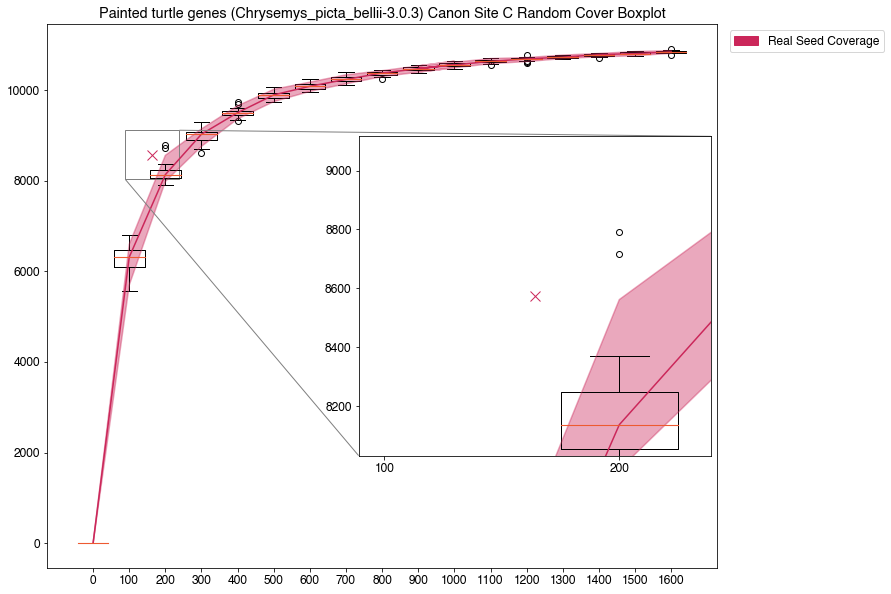

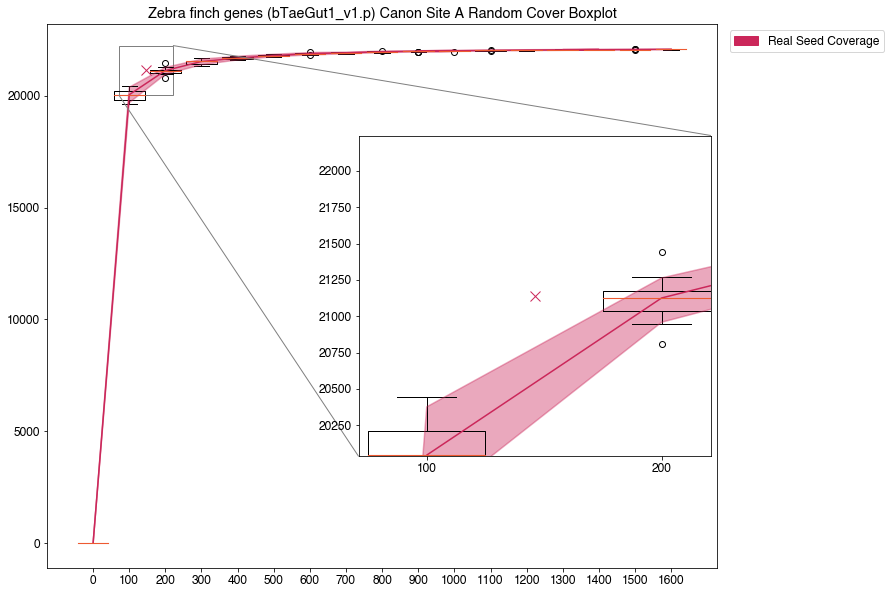

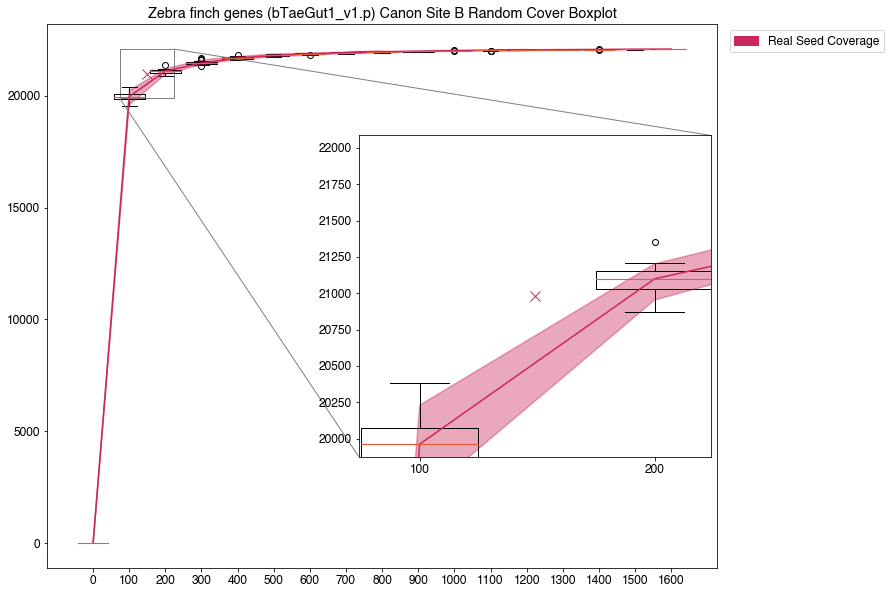

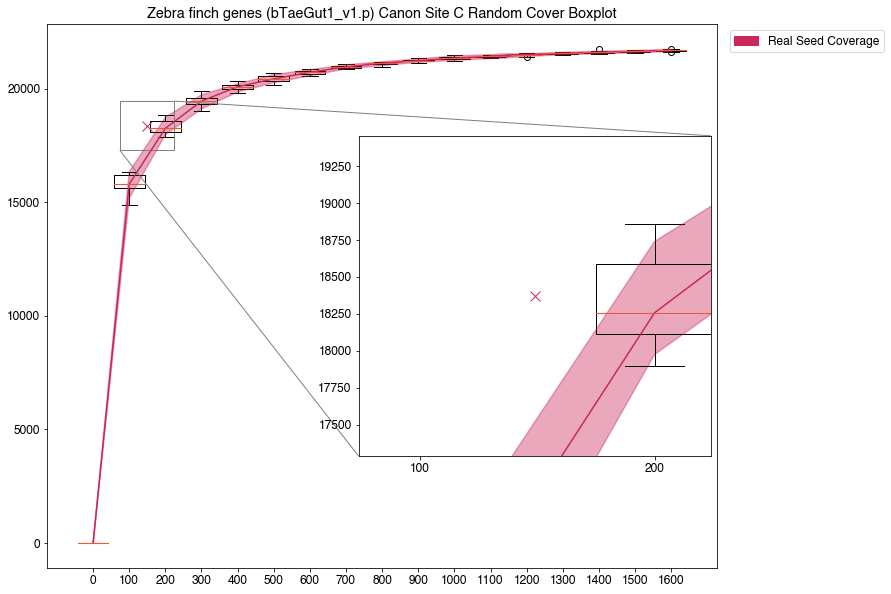

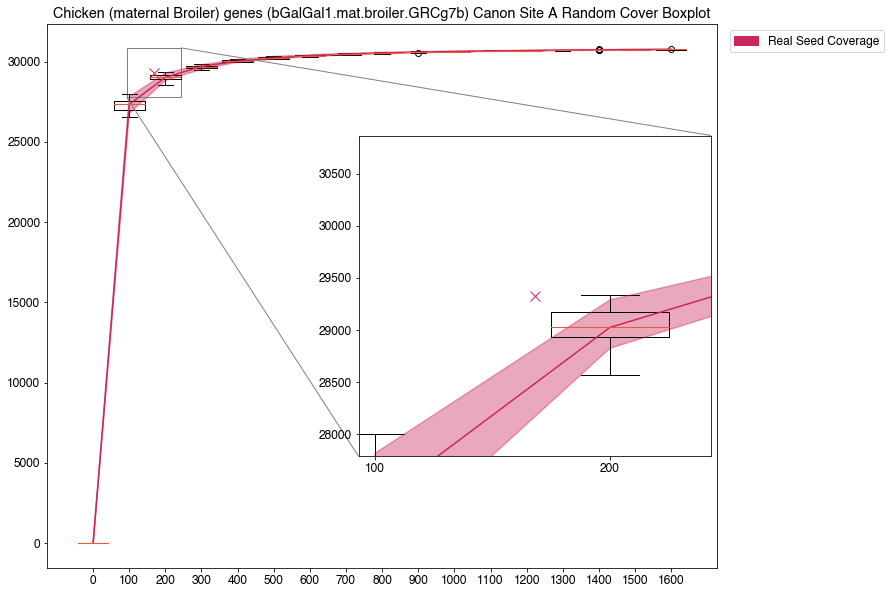

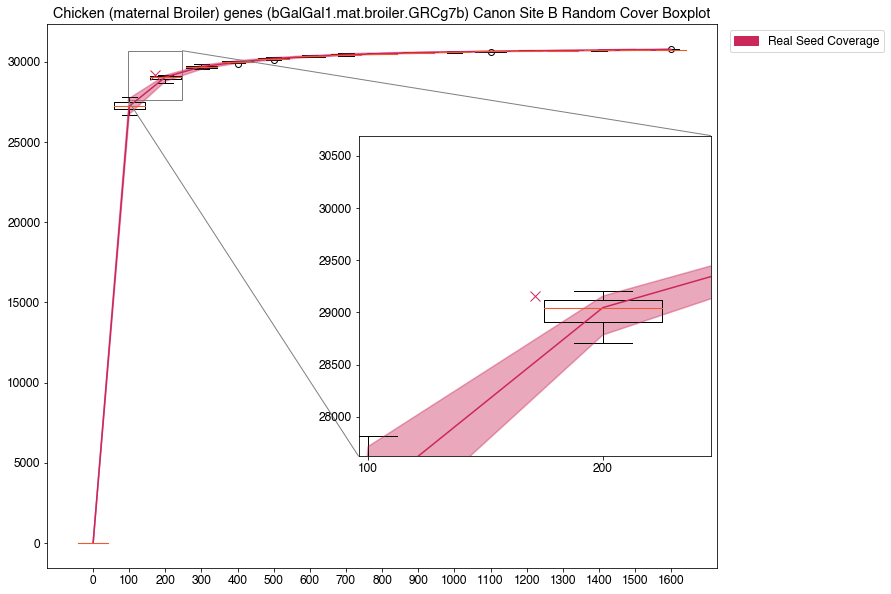

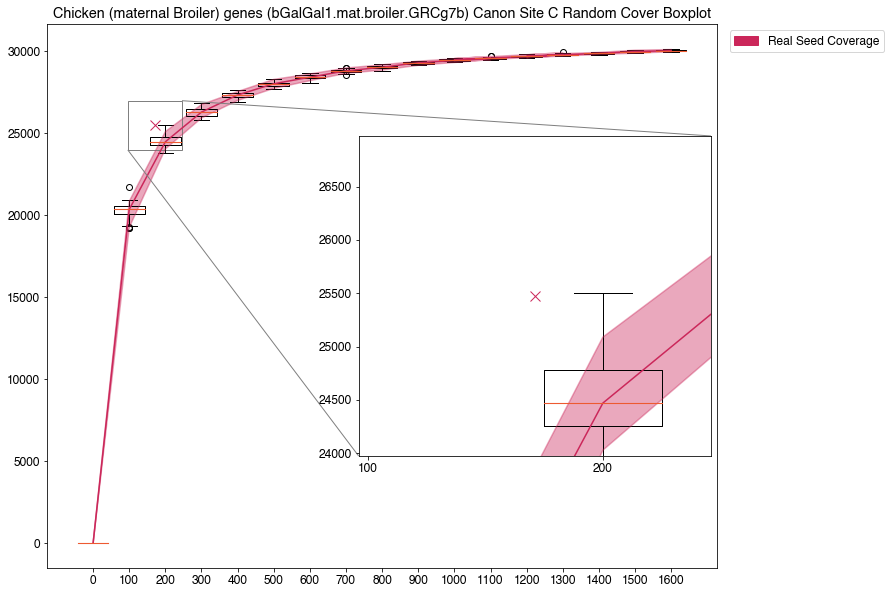

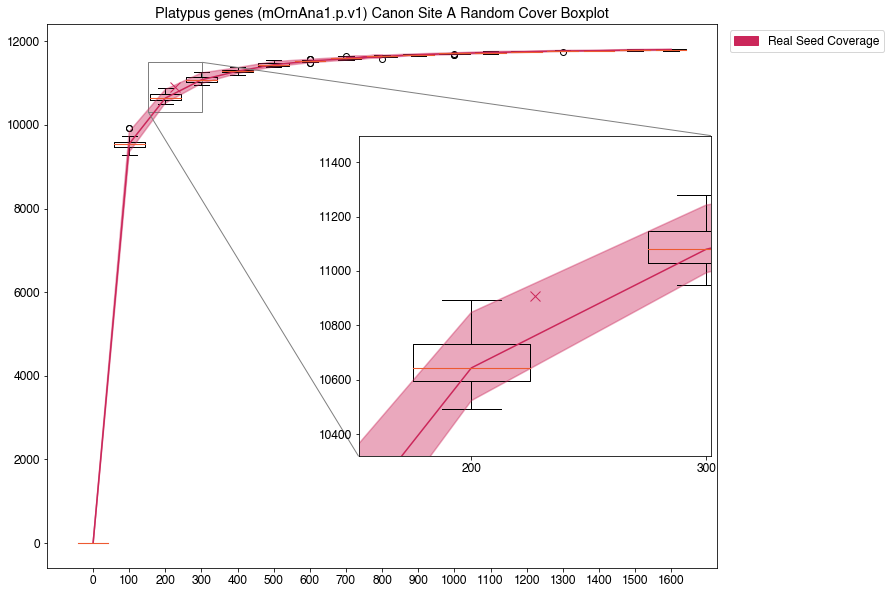

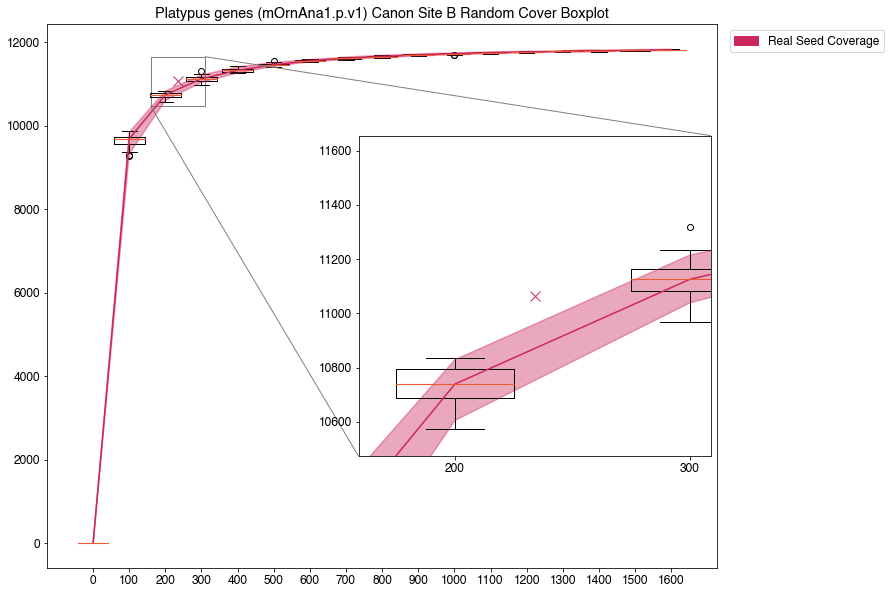

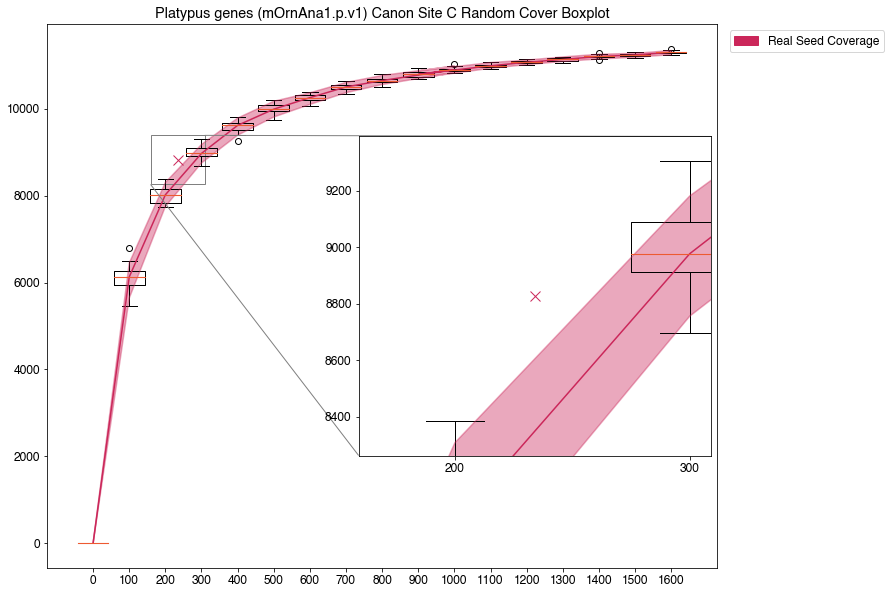

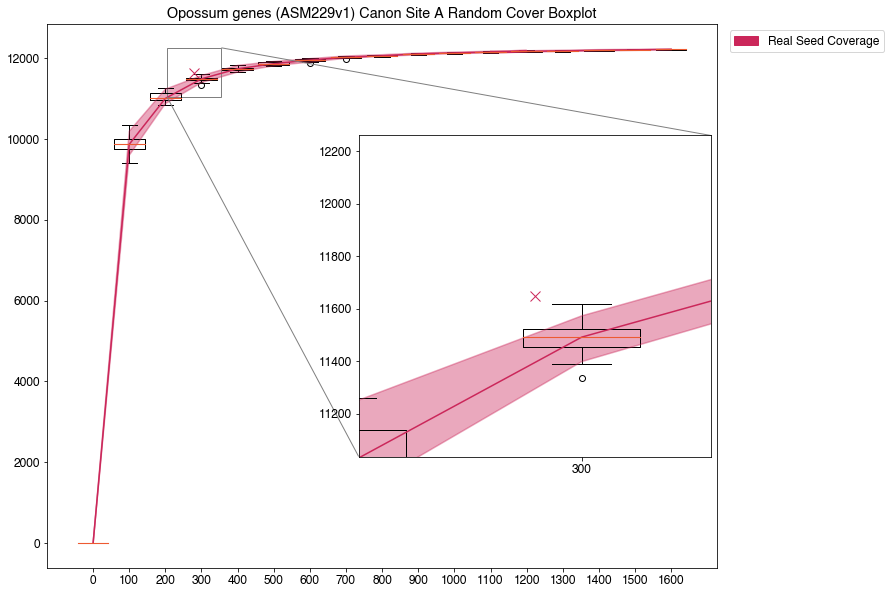

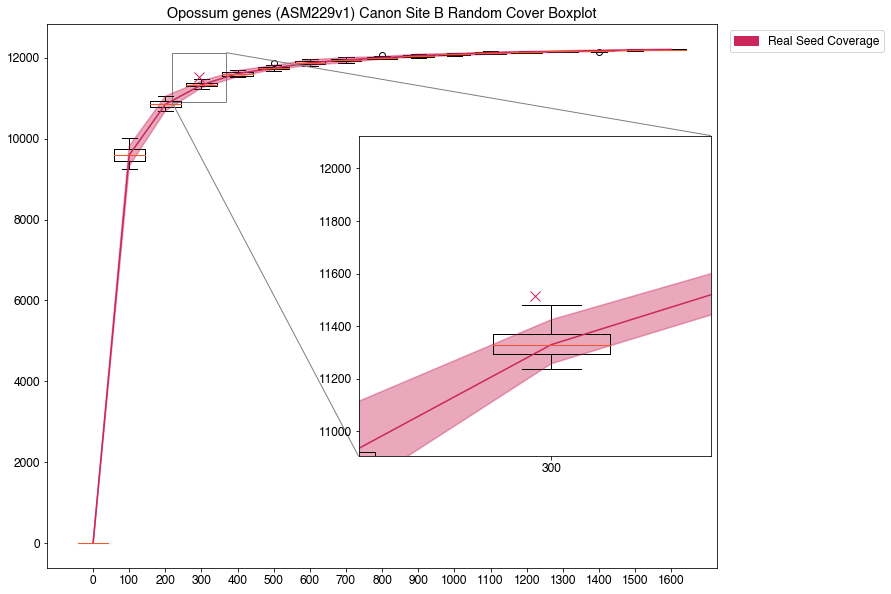

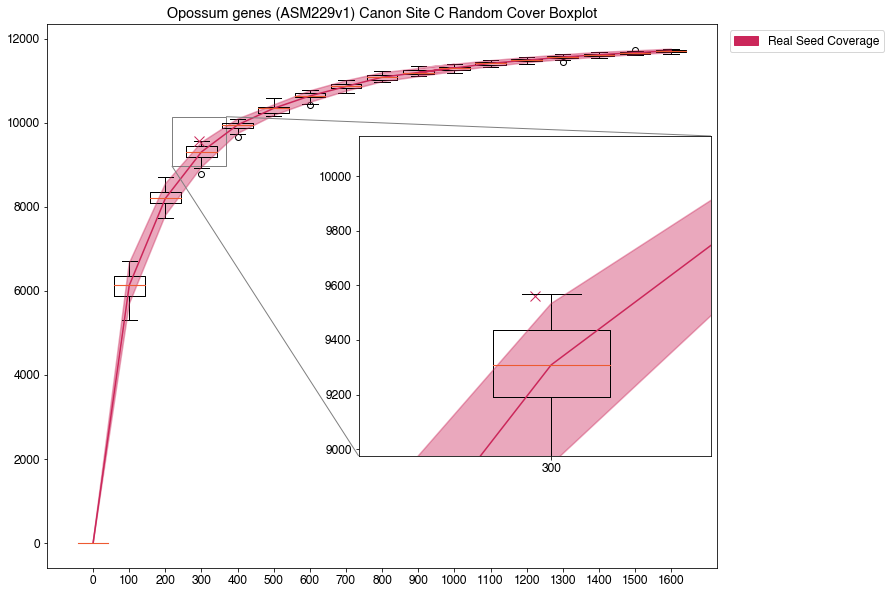

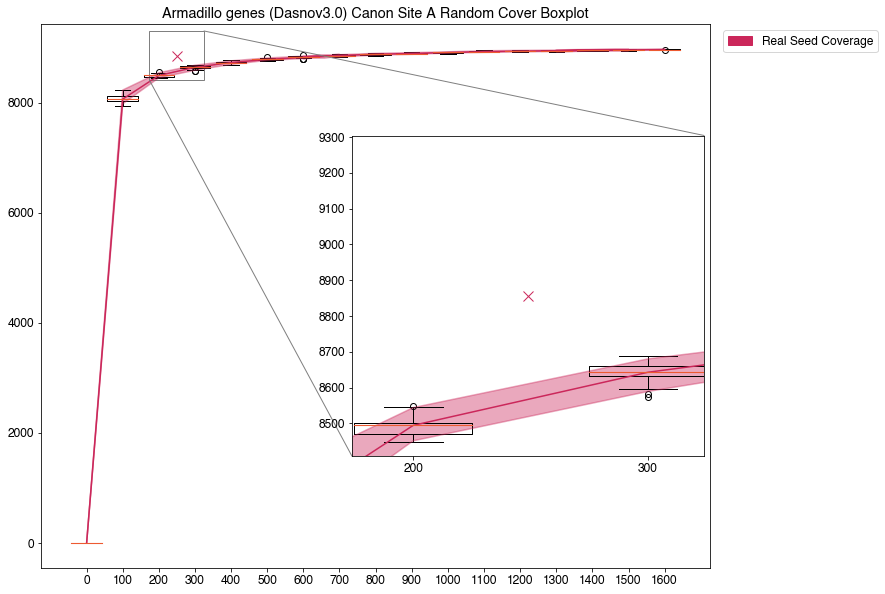

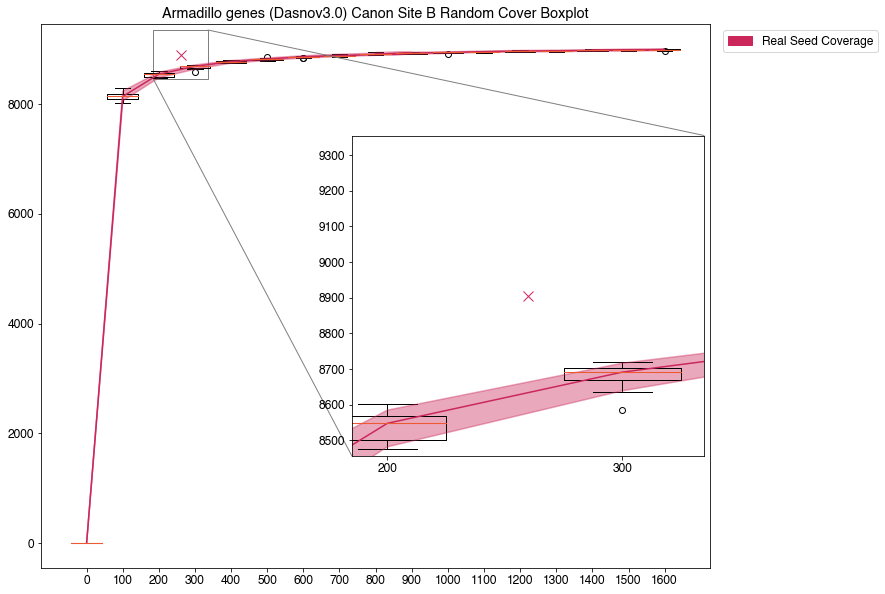

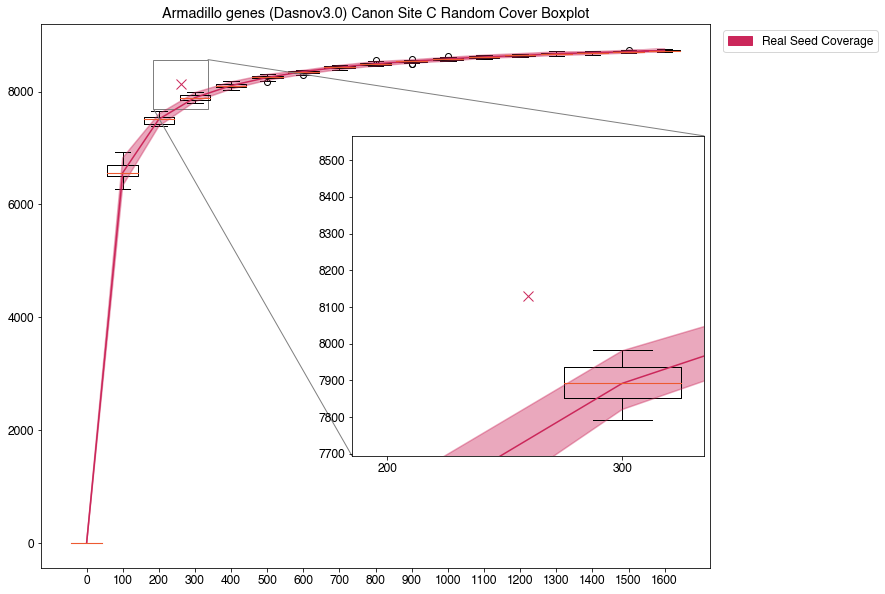

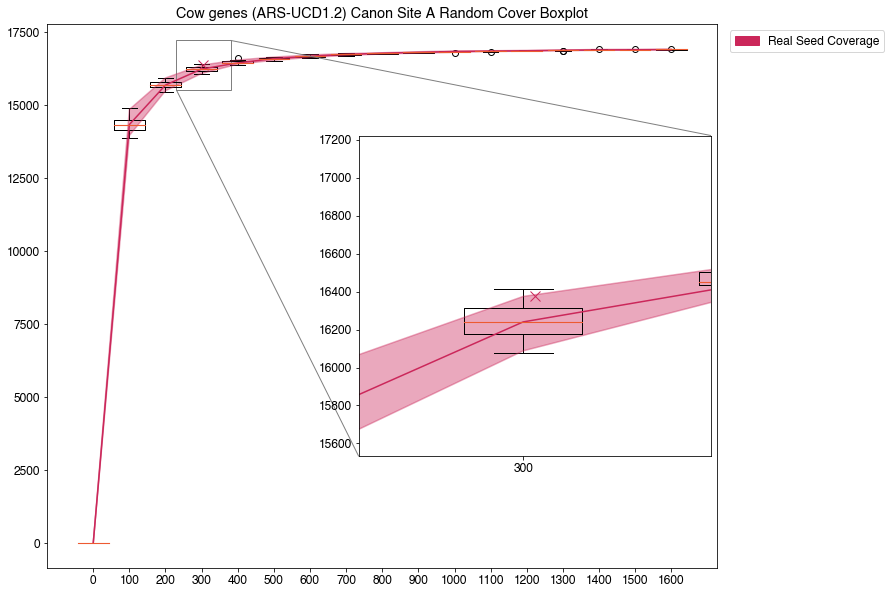

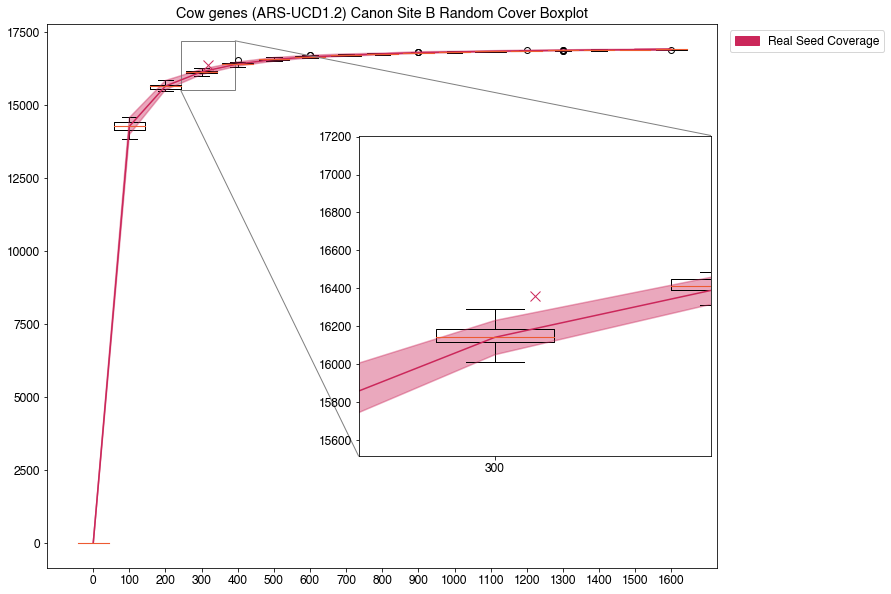

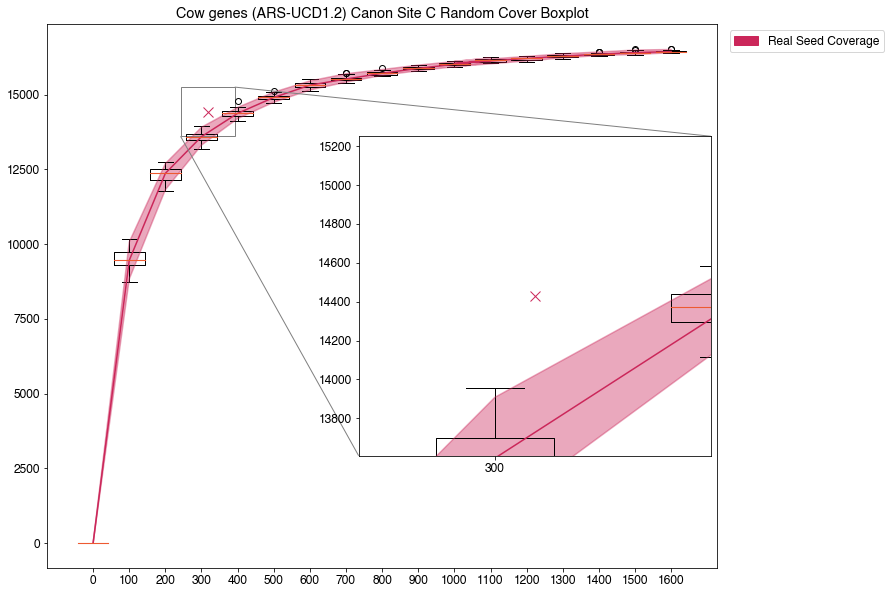

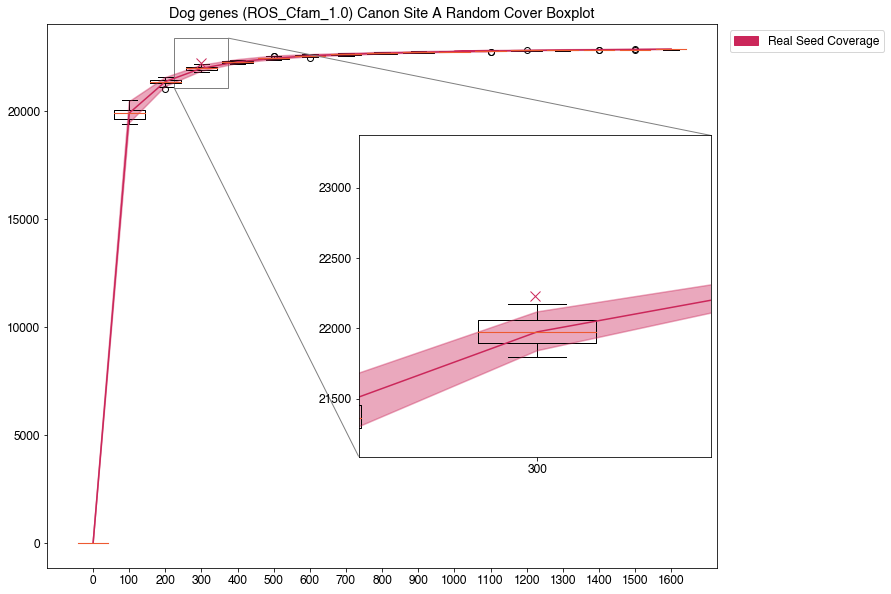

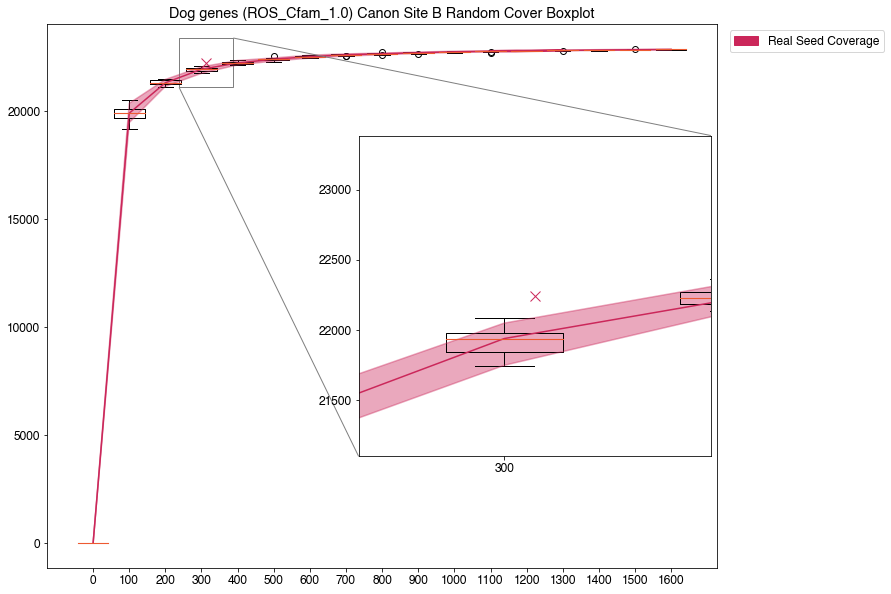

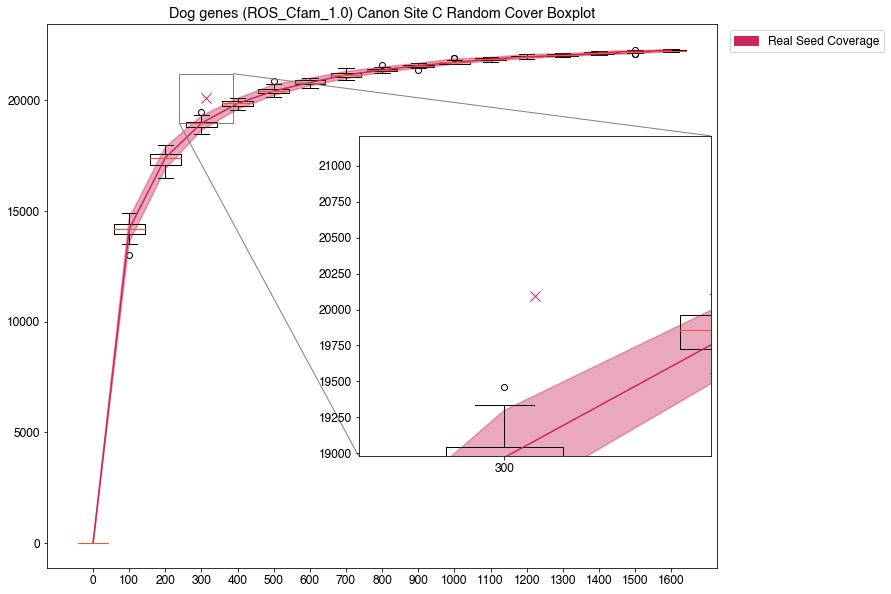

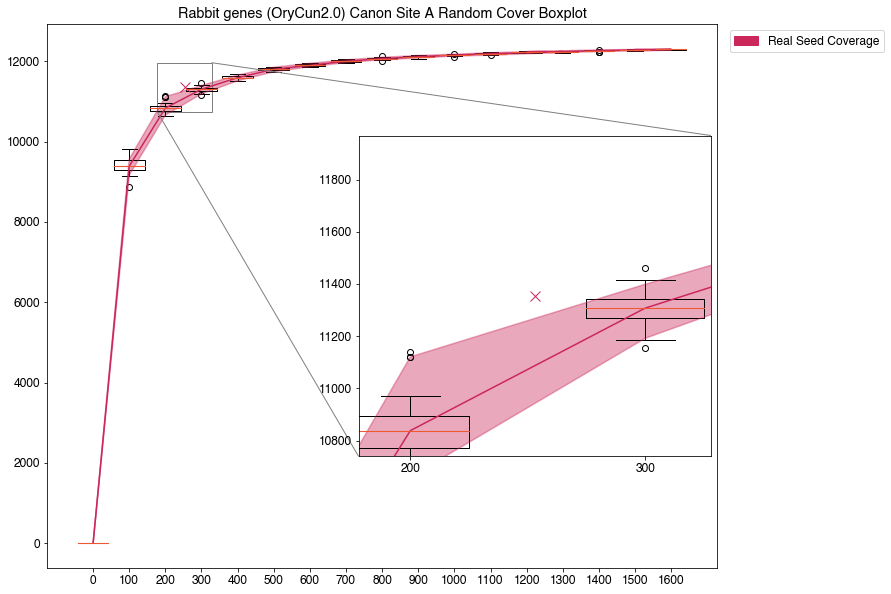

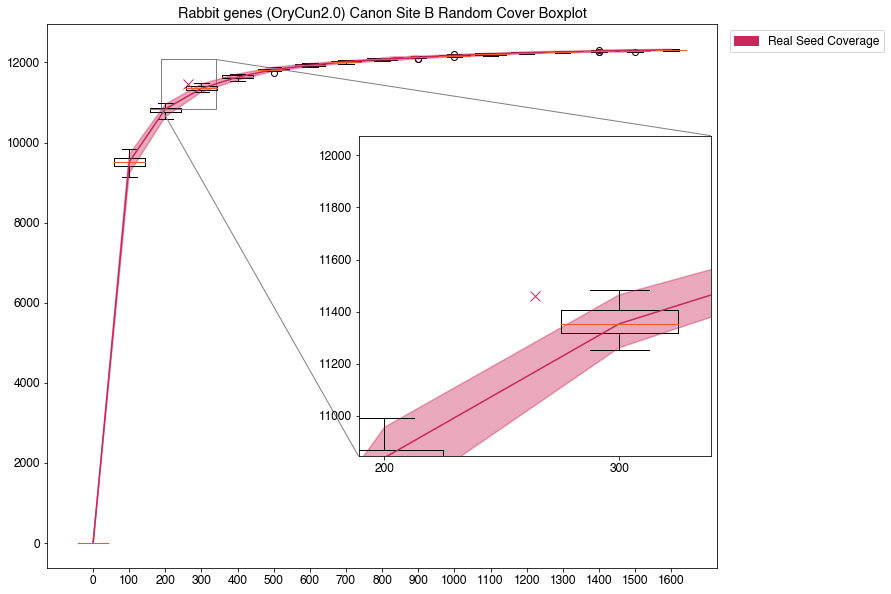

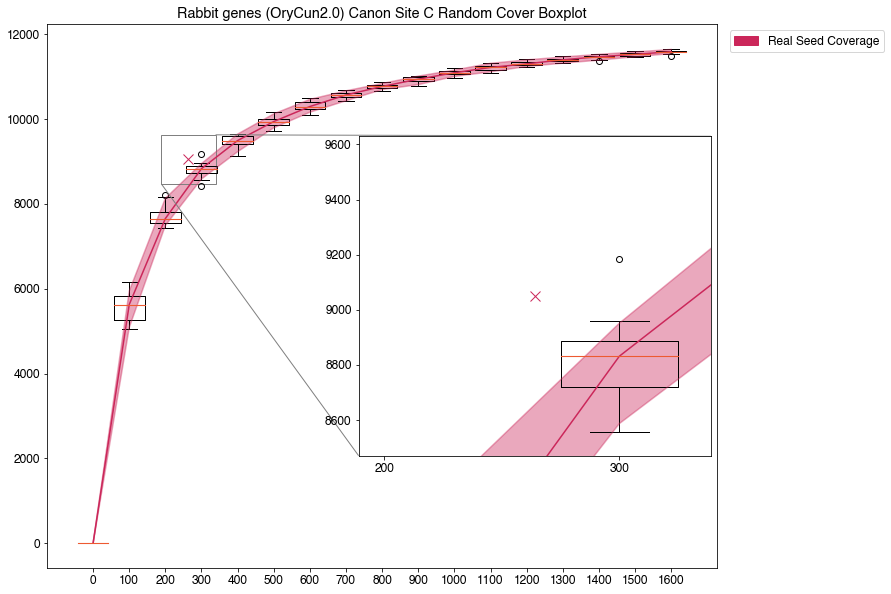

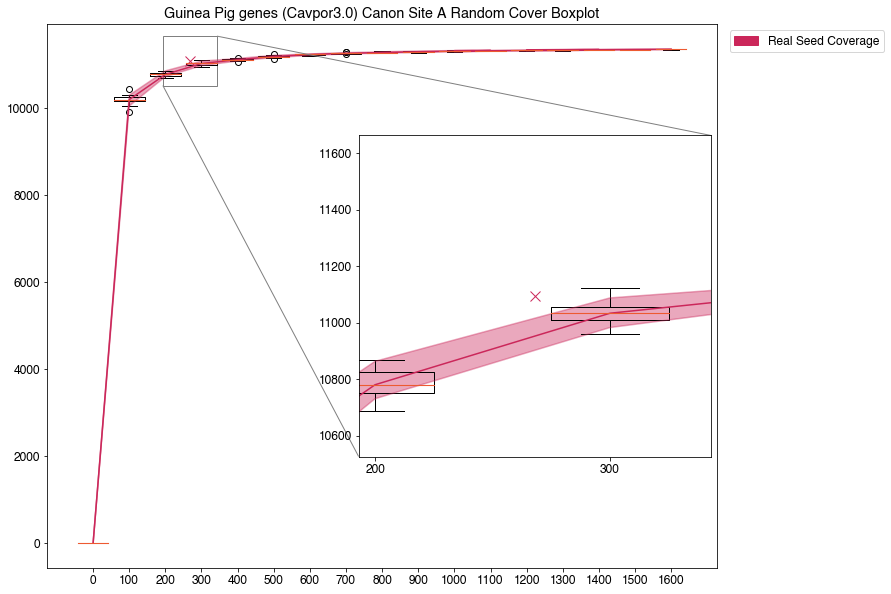

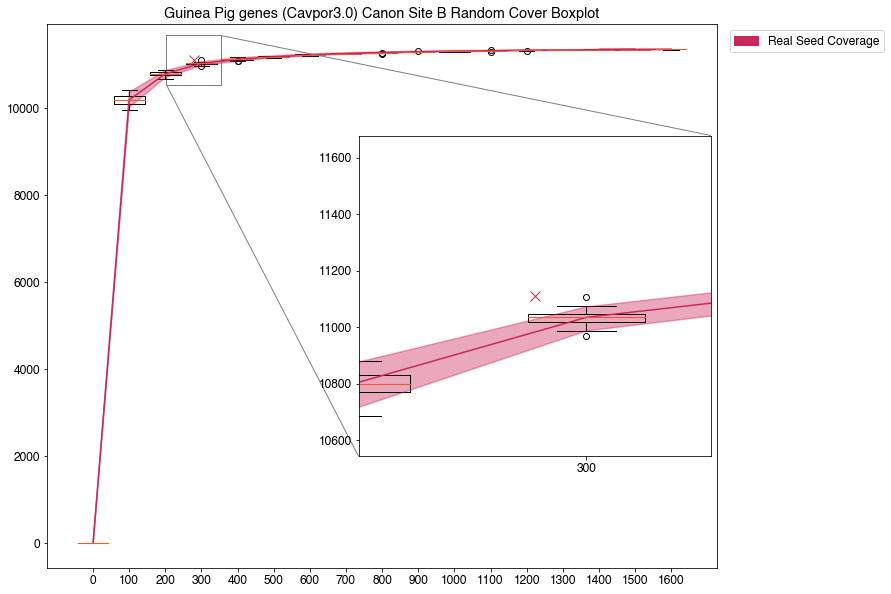

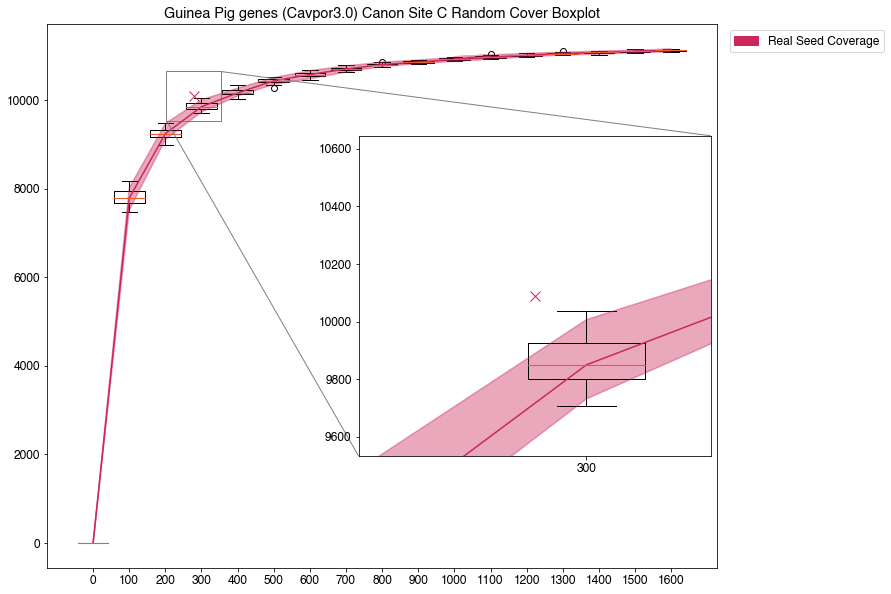

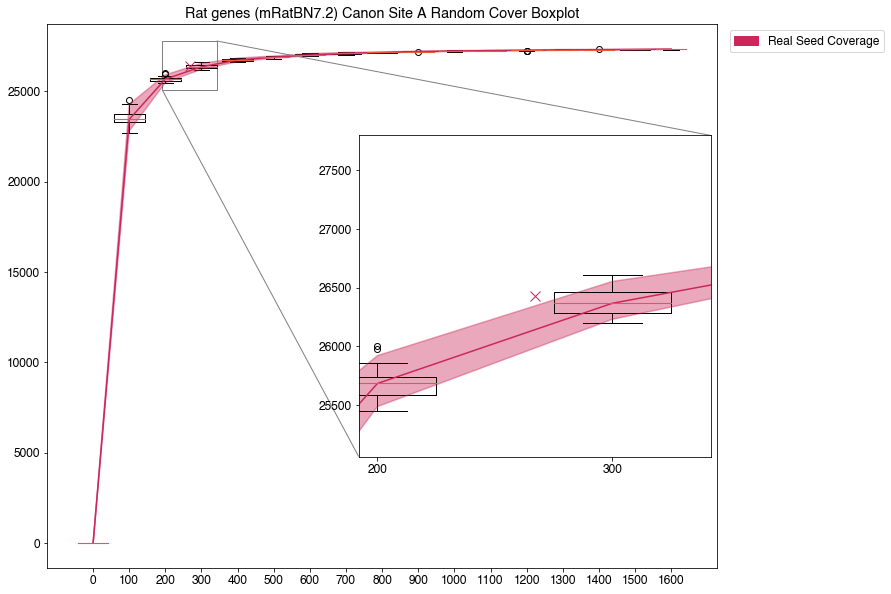

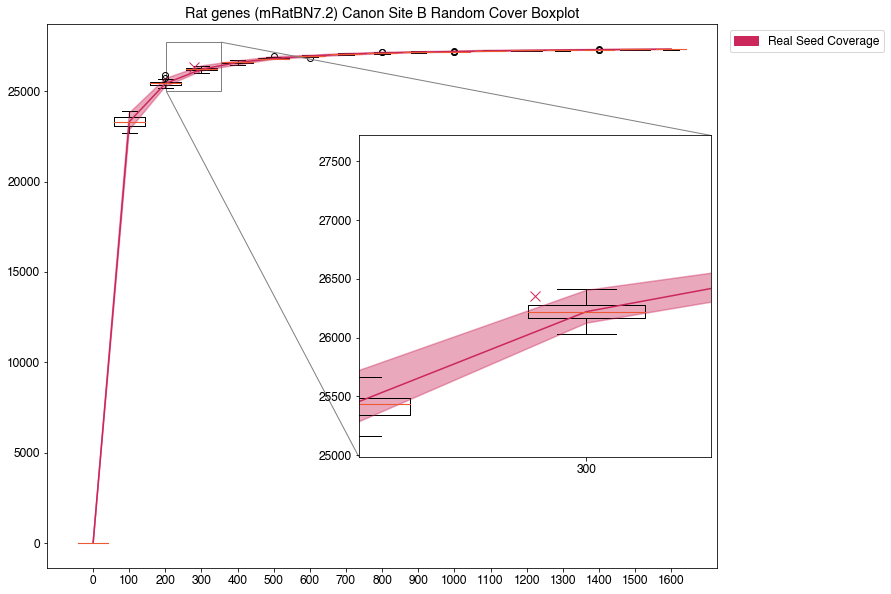

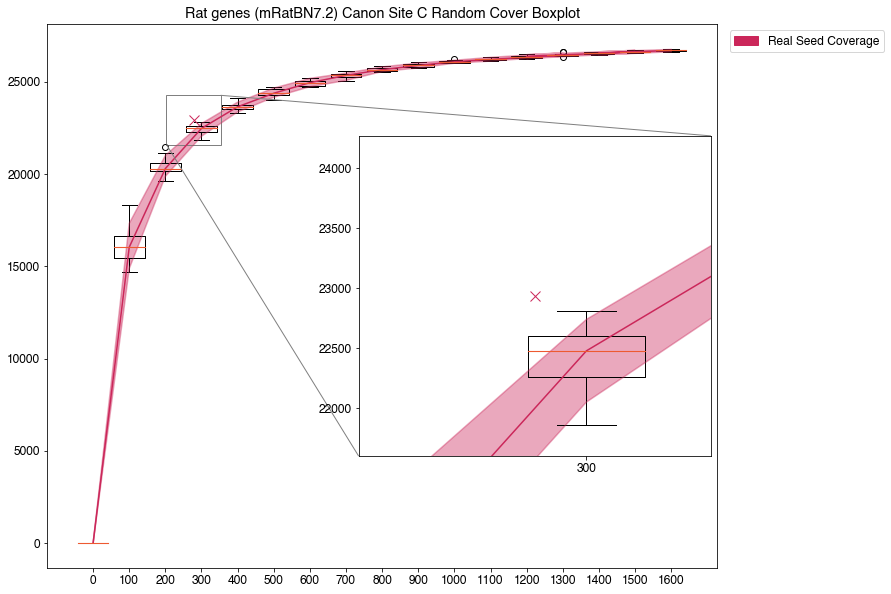

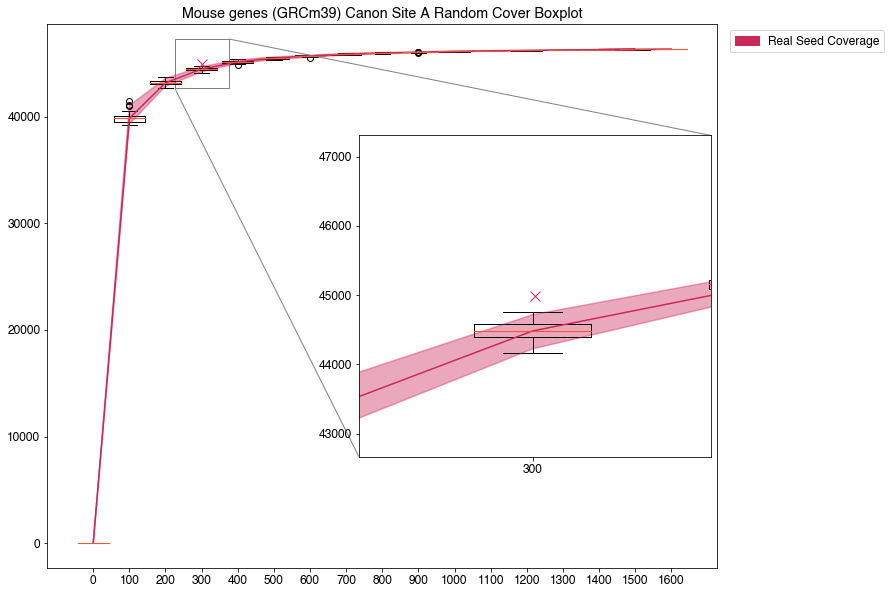

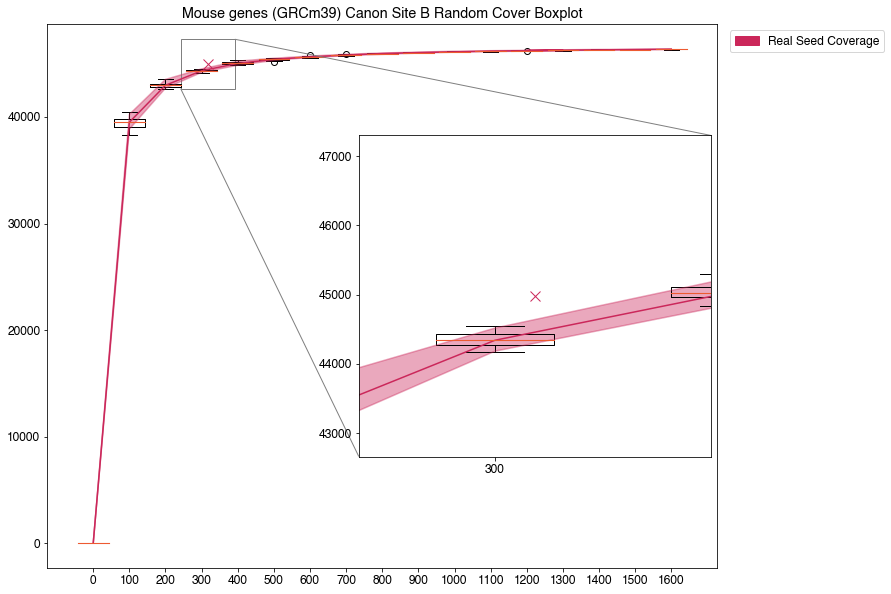

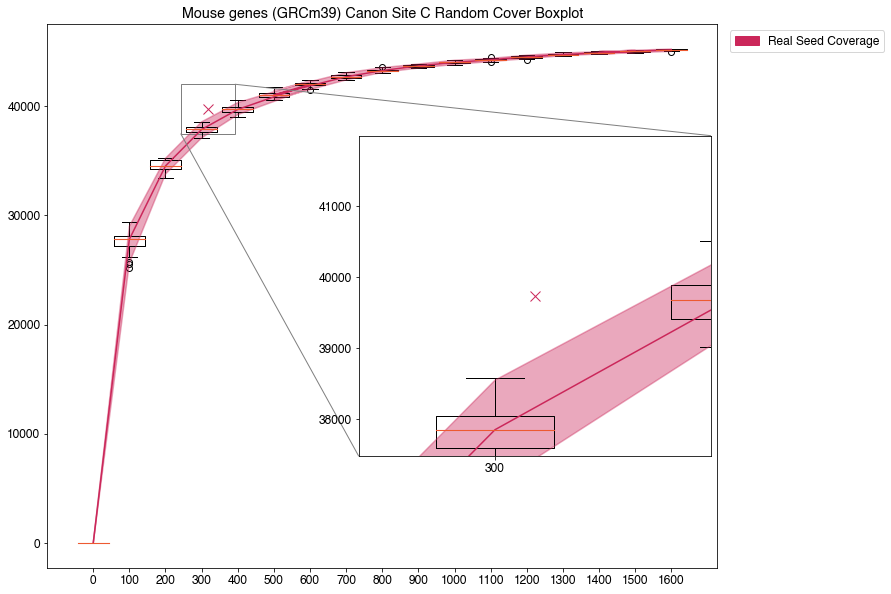

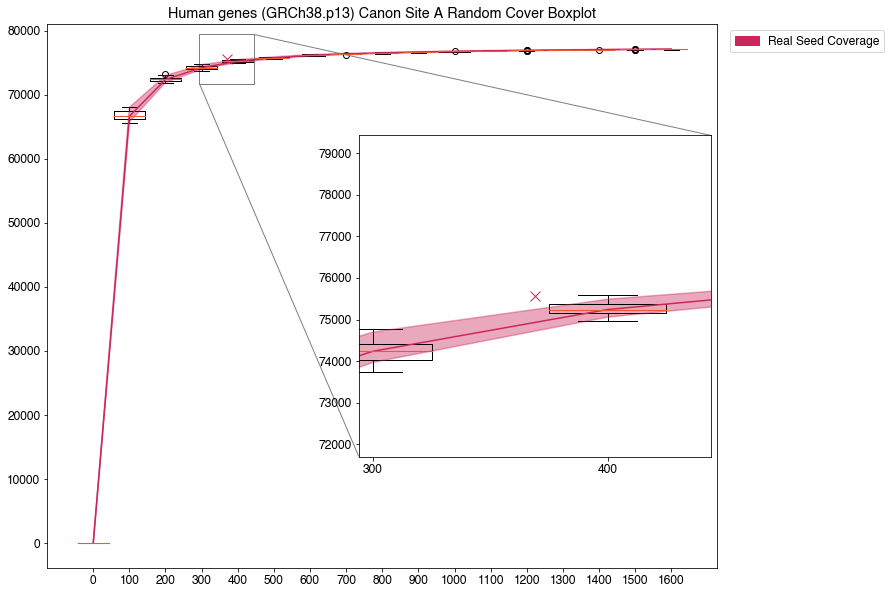

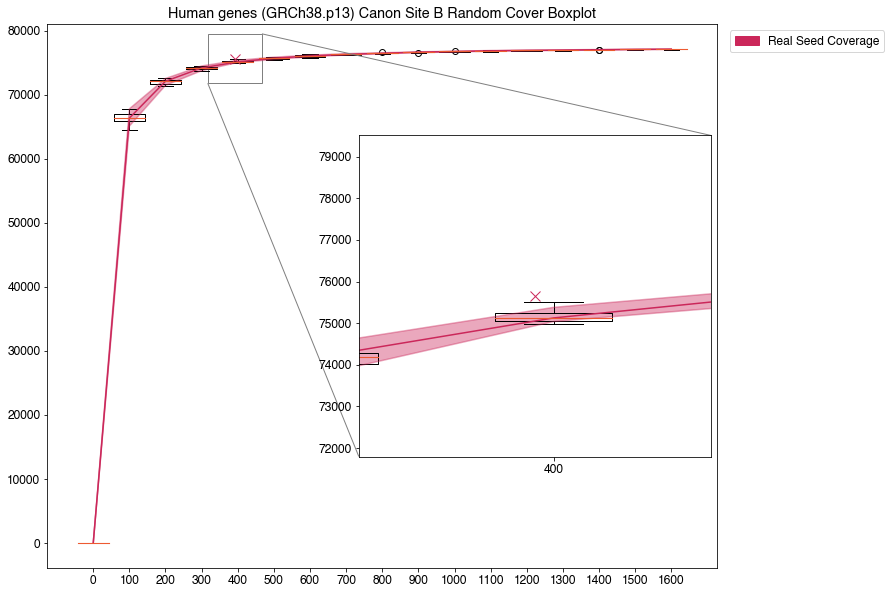

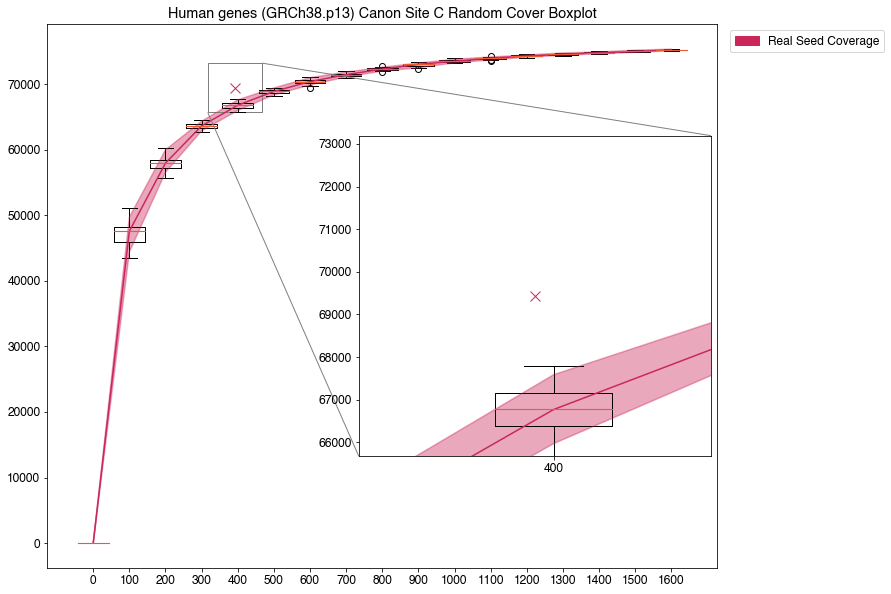

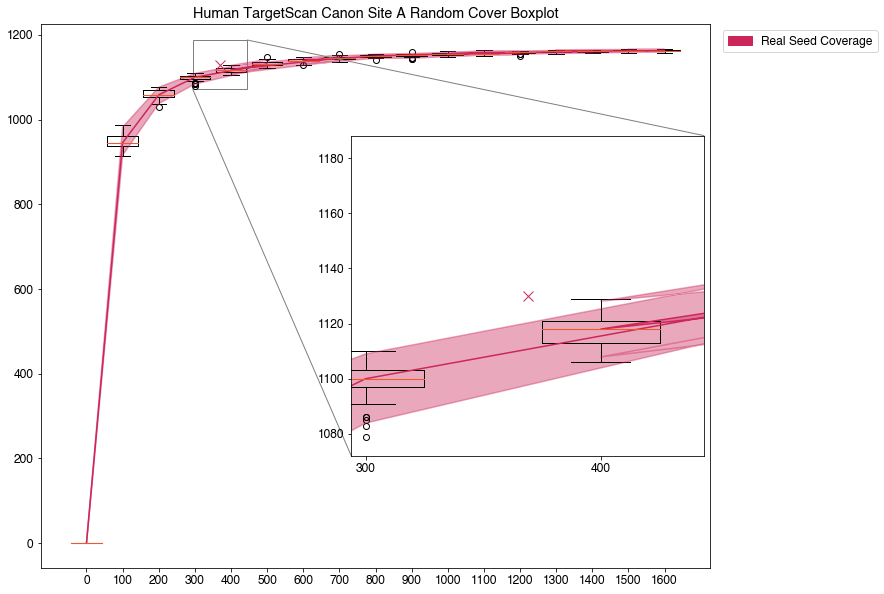

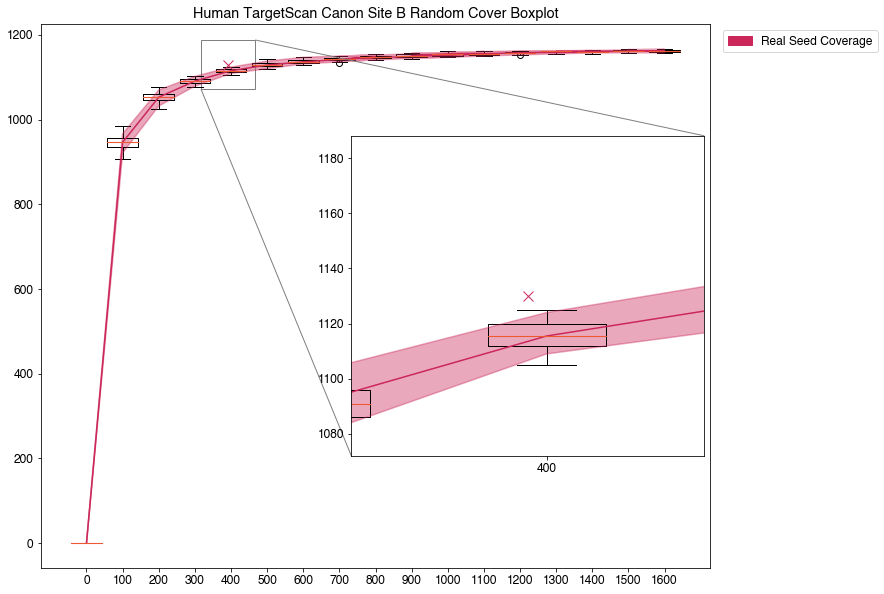

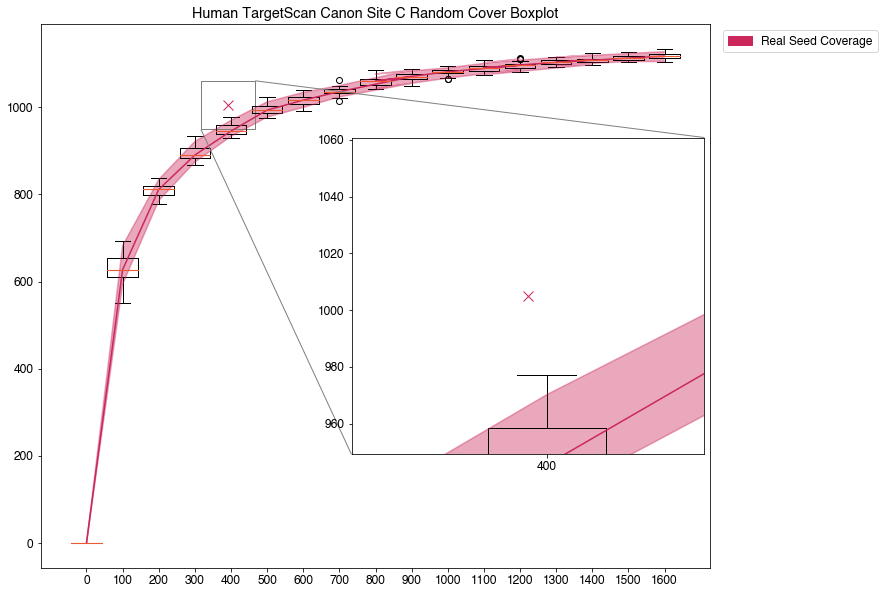

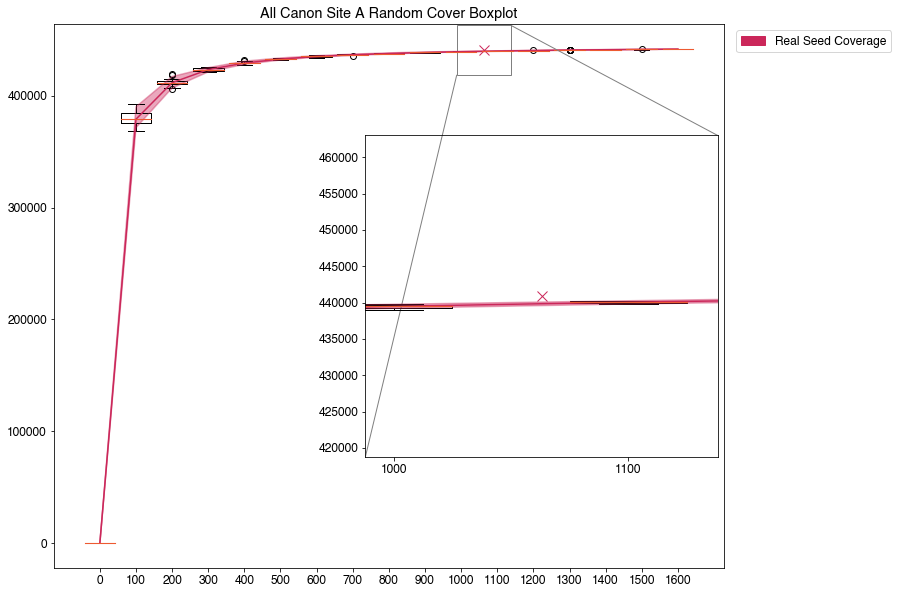

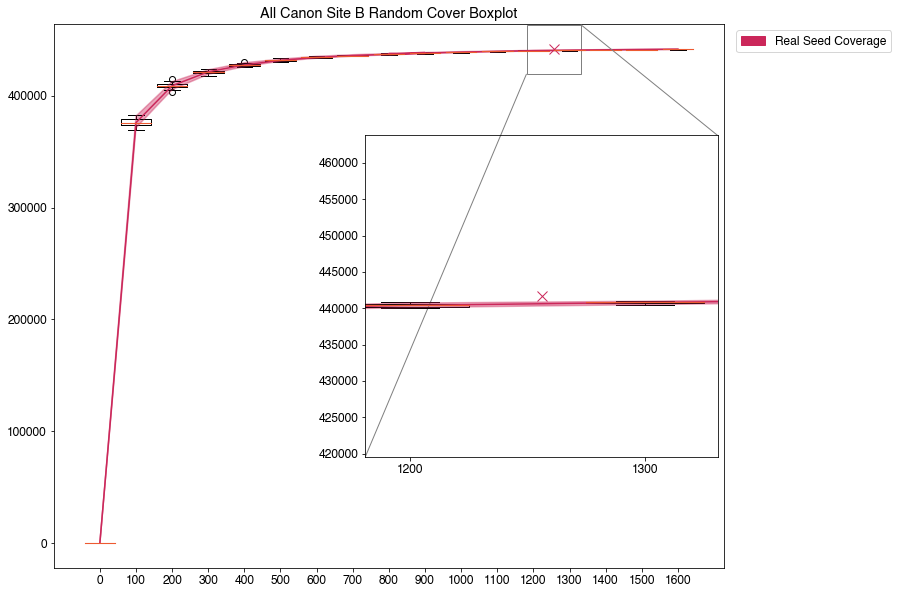

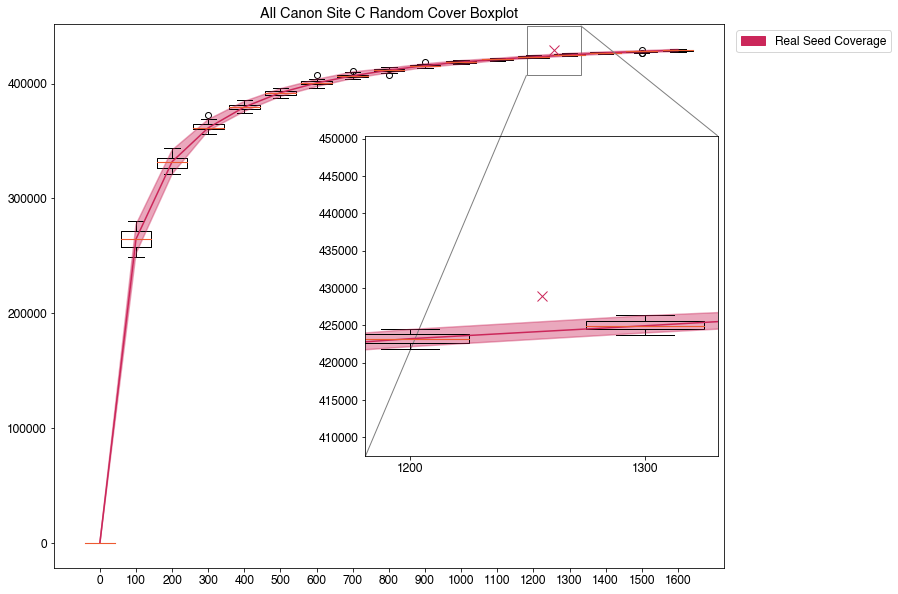

In [583]:
sites = ['A','B','C']
for species in species_list:
    for site in sites:
        simulate_plot(species[0], species[1], site)
